# Pre

In [ ]:
with open("/content/GSE126848_series_matrix.txt", 'r') as f:
    for line in f.readlines():
        if "!Sample_title" in line:
            titles = line.replace('"','').replace('-', '_').split()[1:]
        elif "!Sample_description" in line:
            keys = line.replace('"','').split()[1:]
# titles, keys
key_map = {int(keys[i]):titles[i] for i in range(len(titles))}
# print(key_map)

with open("/content/GSE126848_Gene_counts_raw.txt", 'r') as f:
    lines = f.readlines()
# lines[0]

header_keys = lines[0].replace('"','').strip().split('\t')[1:]
print(header_keys)
new = [key_map[int(key[1:])] for key in header_keys]
print(new)
lines[0] = '\t'.join([lines[0].split('\t')[0], *new]) + '\n'
with open("/content/GSE126848_Gene_counts_keyname.txt", 'w') as f:
    f.writelines(lines)


FileNotFoundError: [Errno 2] No such file or directory: '/content/GSE126848_series_matrix.txt'

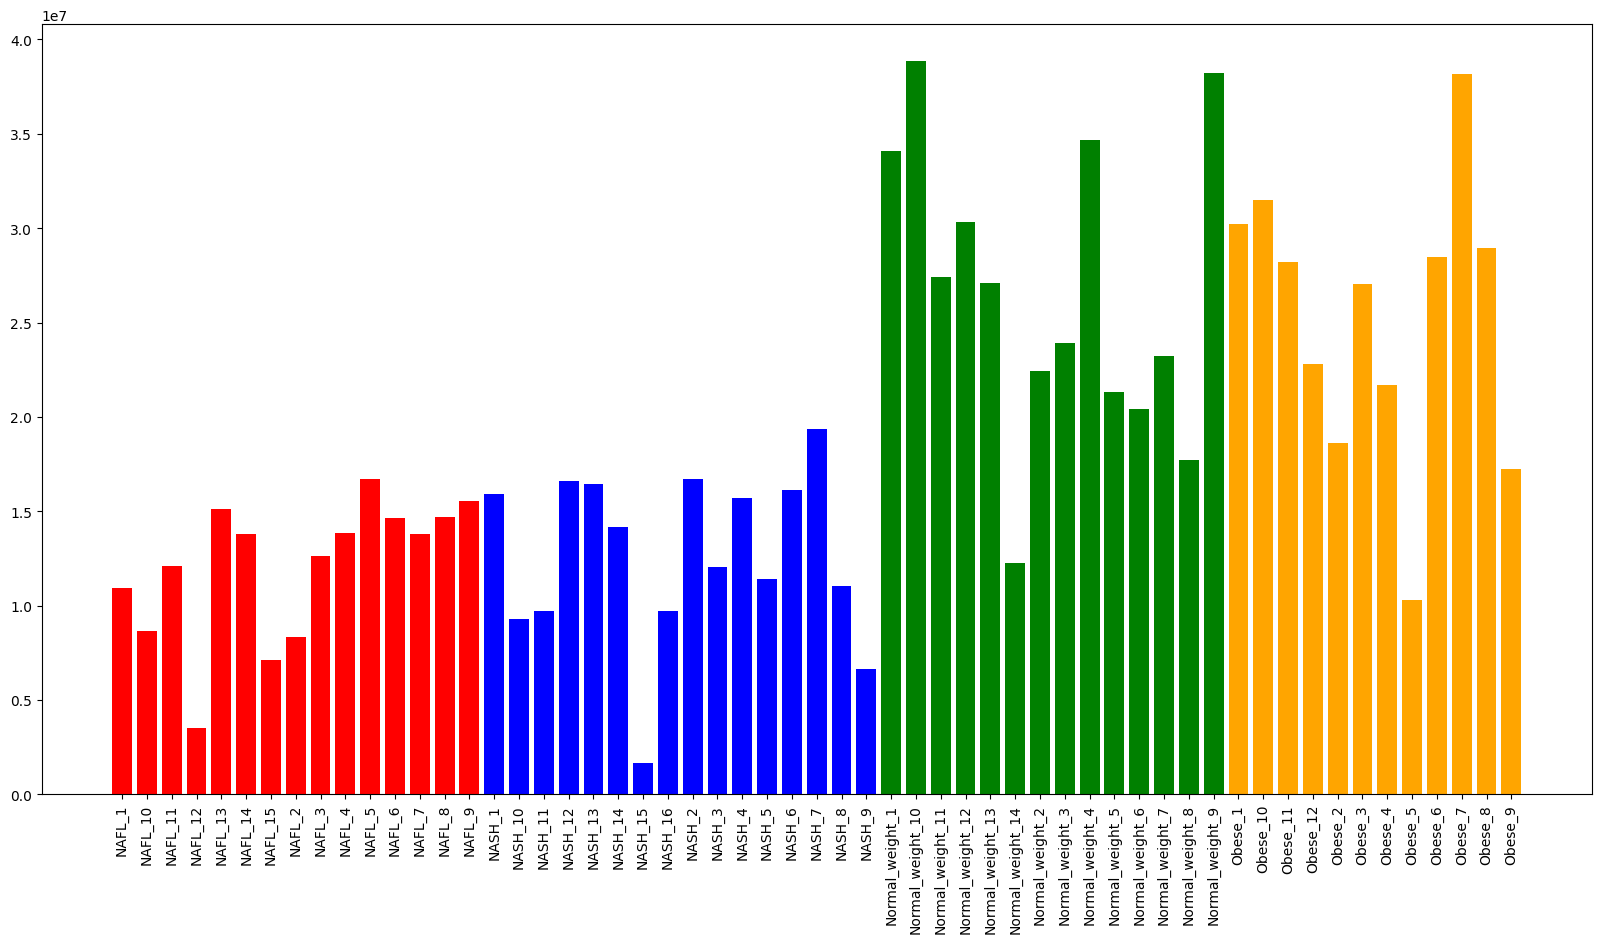

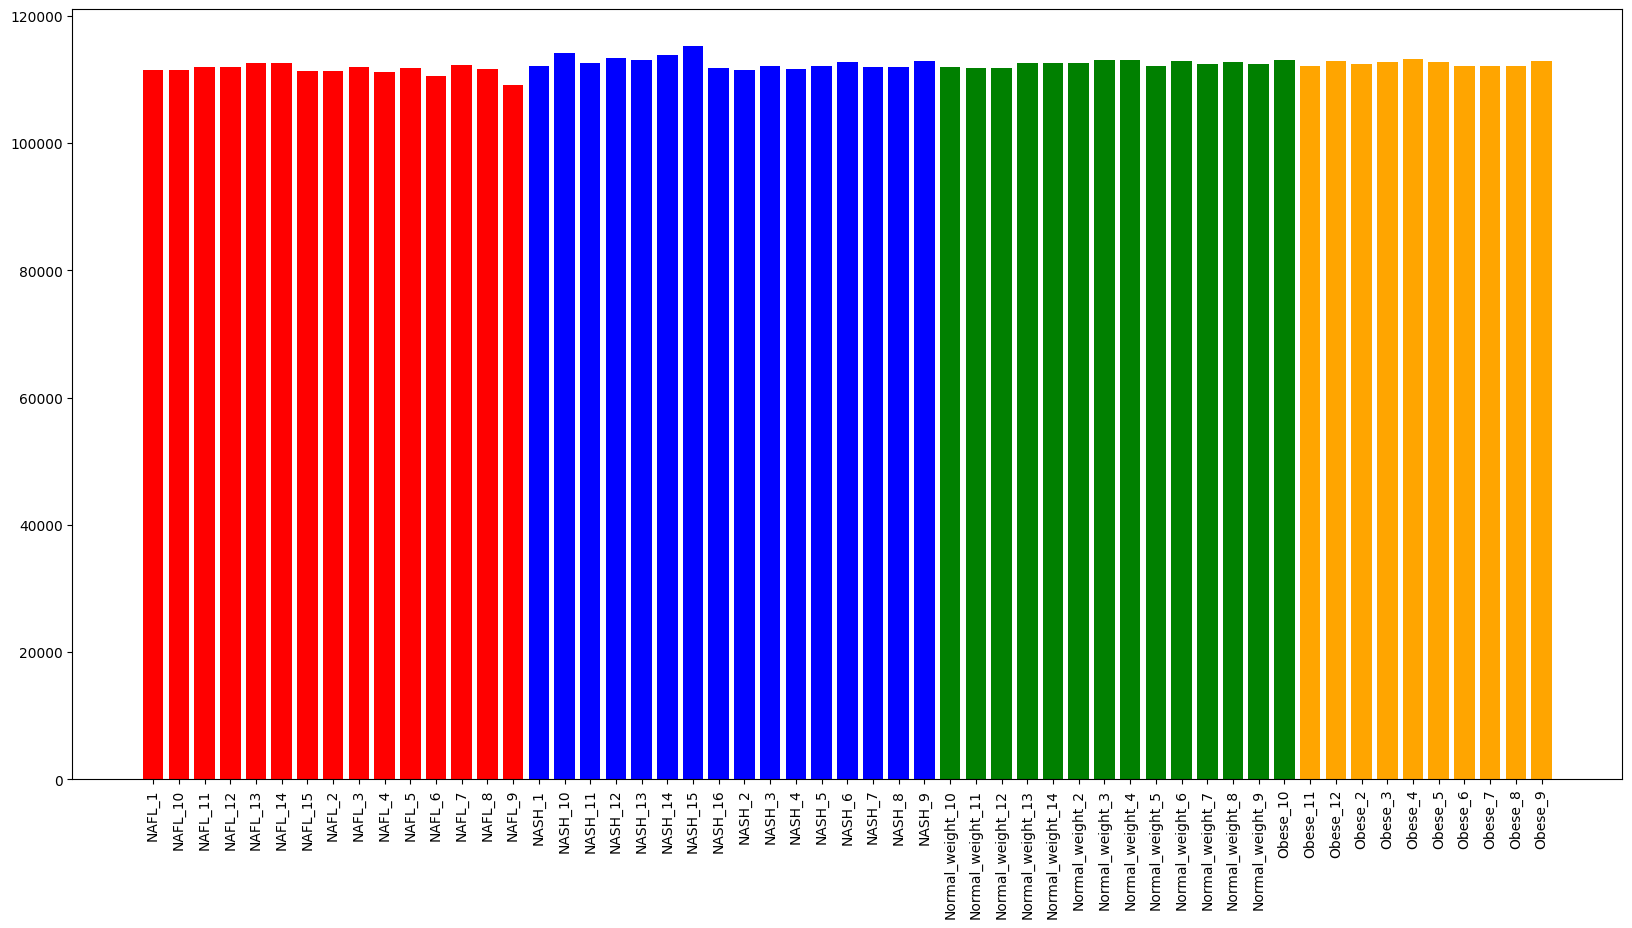

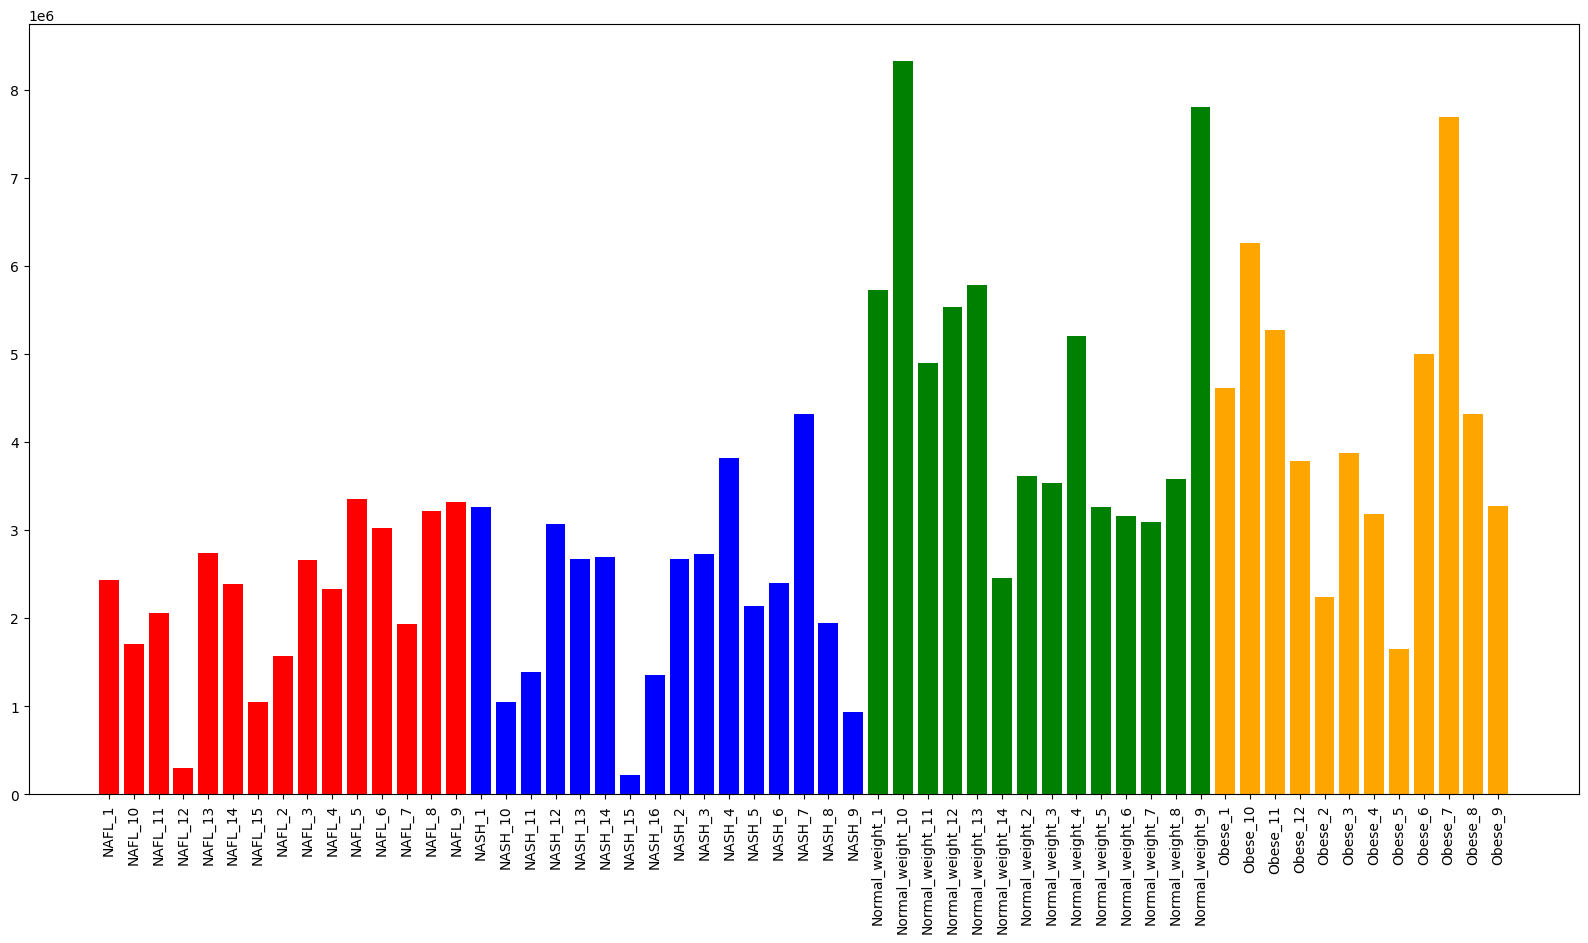

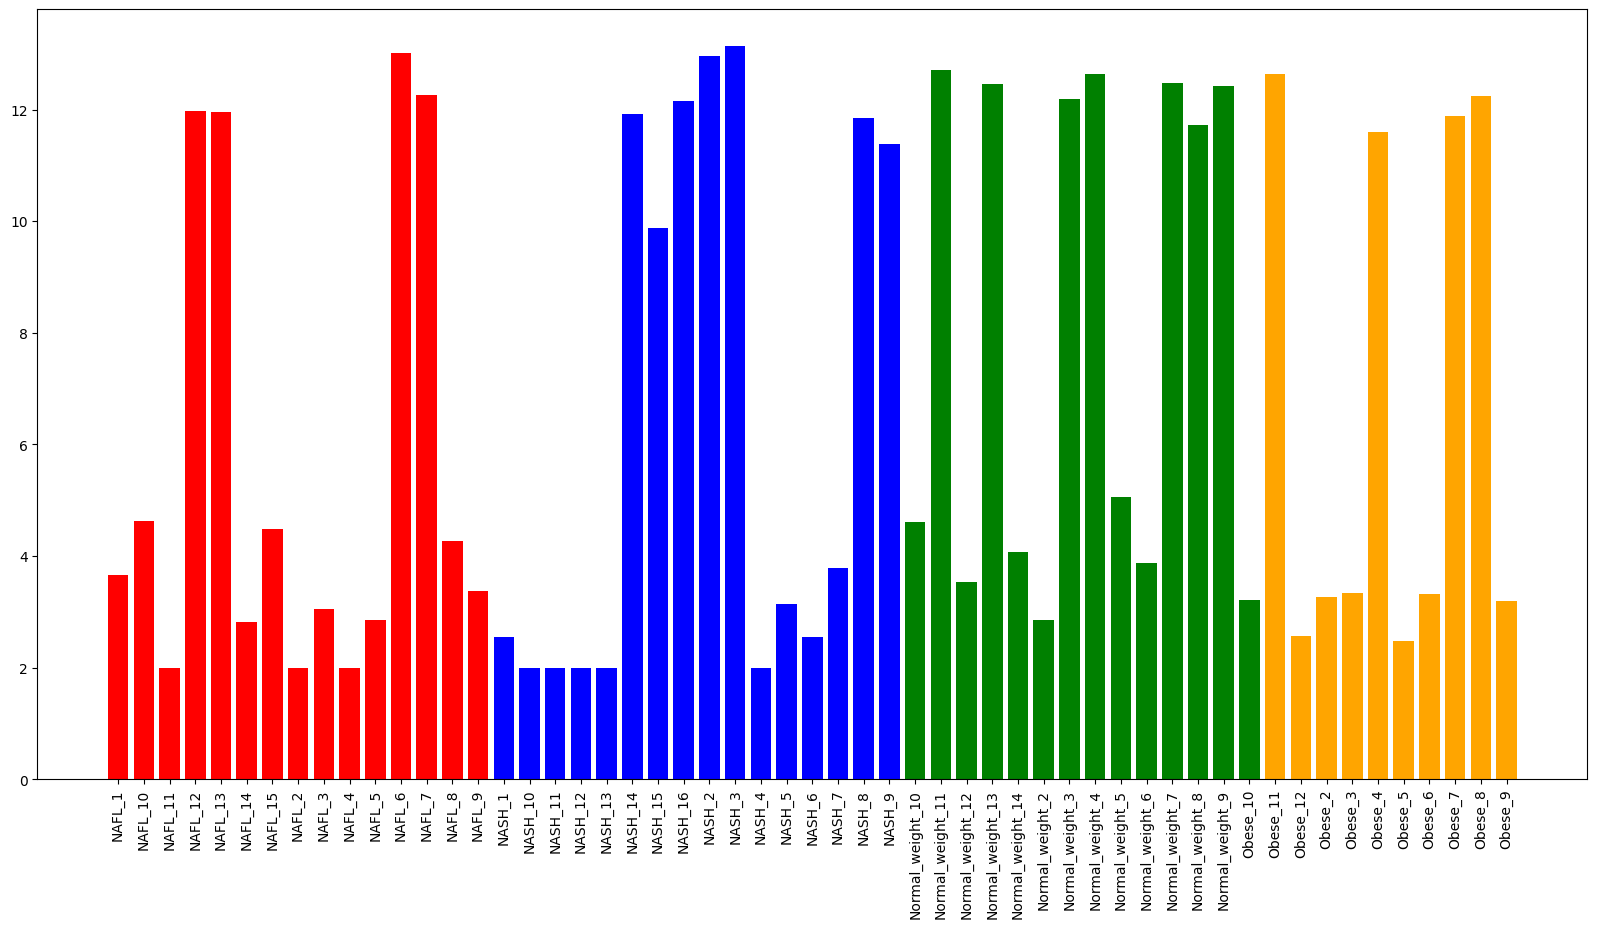

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
ori_df = pd.read_csv("/content/converted_counts_data.csv")
# ori_df.sort_values('User_ID', ignore_index=True, inplace=True)
new_df = pd.read_csv("/content/processed_data.csv")
# new_df.sort_values('User_ID', ignore_index=True, inplace=True)
def bar_plot(df):
  cols = sorted(list(df.iloc[:,3:].columns))
  bar_colors = [*['red']*15, *['blue']*16, *['green']*14, *['orange']*12]
  plt.figure(figsize=(20,10))
  plt.xticks(rotation='vertical')
  for col, color in zip(cols,bar_colors):
    plt.bar(col, df[col].sum(), color=color)

bar_plot(ori_df)
bar_plot(new_df)
bar_plot(ori_df.iloc[:1])
bar_plot(new_df.iloc[:1])

# Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, Model
from scipy.stats import norm
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install -q gdown

import gdown
#https://drive.google.com/file/d/14oinMmA-dCIiwqd3ibnRYPwIZrk3m-56/view?usp=sharing
# 替換為你的檔案 ID
file_id = "14oinMmA-dCIiwqd3ibnRYPwIZrk3m-56"
output = "processed_data.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=14oinMmA-dCIiwqd3ibnRYPwIZrk3m-56
To: /content/processed_data.csv
100%|██████████| 10.7M/10.7M [00:00<00:00, 42.8MB/s]


'processed_data.csv'

In [ ]:
df = pd.read_csv('/content/processed_data.csv',index_col=0)
print(df.shape)
print(df.head())
# print(df.iloc[0])

(19786, 57)
        Normal_weight_1    Obese_1  Normal_weight_2    Obese_2  \
gene                                                             
GSTM1          3.661318  12.023007         2.851760   3.264780   
RPS4Y1        10.155229  10.451913        10.407771  10.505715   
CFHR1         13.350832  12.958124        13.341538  11.569136   
ZBTB20         7.107514   7.126310         7.066517   6.614631   
AOC1           2.388474   3.384127         7.107503   8.310837   

        Normal_weight_3    Obese_3  Normal_weight_4    Obese_4  \
gene                                                             
GSTM1         12.184096   3.346629        12.633055  11.590442   
RPS4Y1        10.577117   9.987547        10.276433  10.475299   
CFHR1         13.217339  13.234753        11.741278  13.663629   
ZBTB20         6.823555   6.881594         6.573433   6.929582   
AOC1           8.090823   2.642613         7.852333   3.235849   

        Normal_weight_5  Normal_weight_6  ...    NASH_11    NA

In [ ]:
df.isnull().sum()

,0
Normal_weight_1,0
Obese_1,0
Normal_weight_2,0
Obese_2,0
Normal_weight_3,0
Obese_3,0
Normal_weight_4,0
Obese_4,0
Normal_weight_5,0
Normal_weight_6,0


Normal_weight_1     113130.786846
Obese_1             113027.579916
Normal_weight_2     112541.466044
Obese_2             112399.442709
Normal_weight_3     113027.286984
Obese_3             112809.515941
Normal_weight_4     113150.606913
Obese_4             113159.521178
Normal_weight_5     112176.748311
Normal_weight_6     112850.759622
Normal_weight_7     112454.780346
Normal_weight_8     112734.117083
Obese_5             112751.592405
Normal_weight_9     112472.262544
Obese_6             112066.862880
Normal_weight_10    112049.344004
Obese_7             112160.199927
Normal_weight_11    111803.077991
Obese_8             112172.769421
Normal_weight_12    111803.110276
Obese_9             112889.459331
Obese_10            113077.009483
Normal_weight_13    112605.232793
Obese_11            112185.536645
Obese_12            113000.163031
Normal_weight_14    112603.176902
NAFL_1              111441.162607
NASH_1              112153.935409
NAFL_2              111362.536220
NAFL_3        

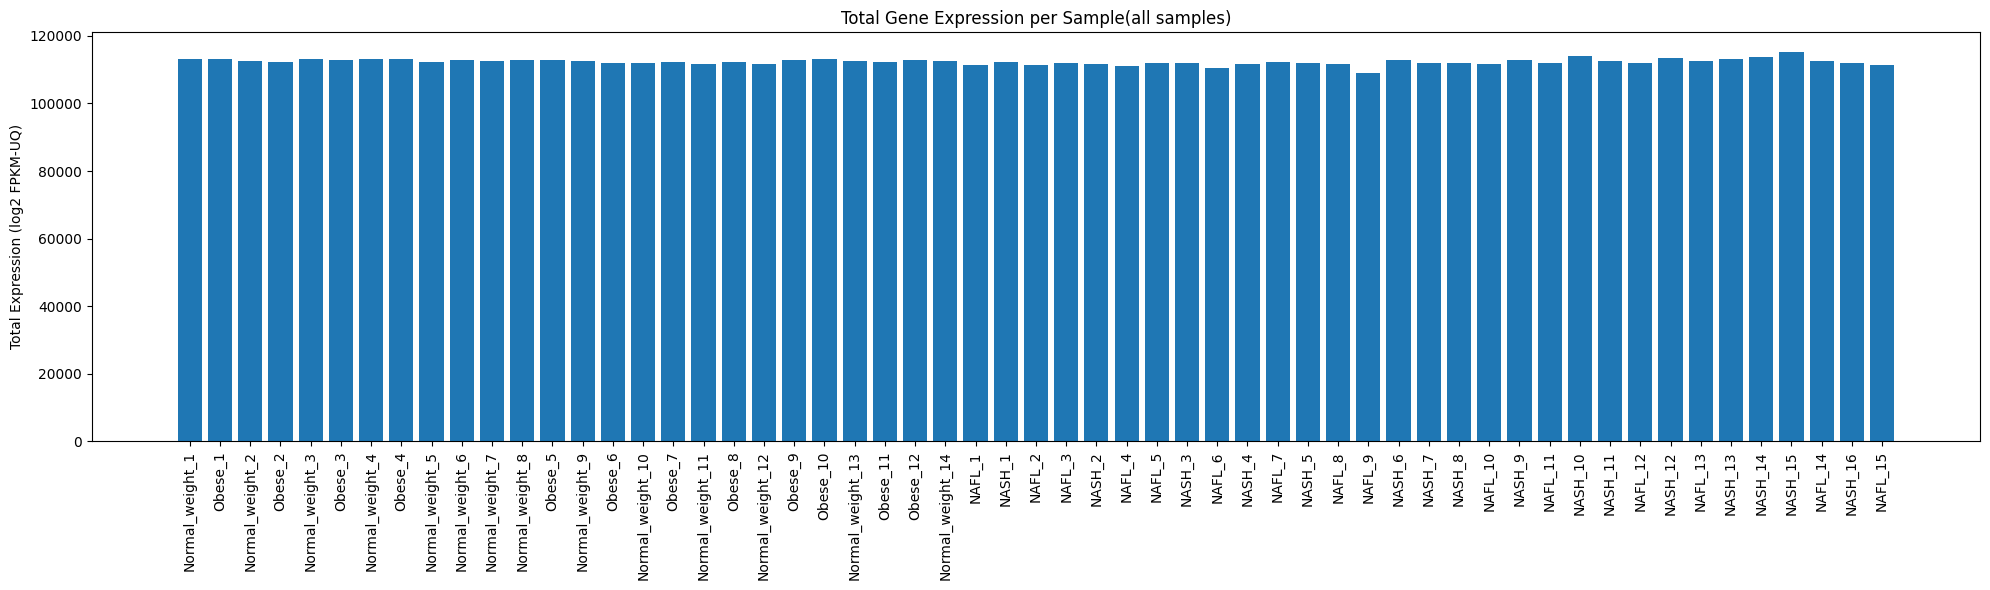

In [ ]:
sample_totals = df.sum(axis=0)
print(sample_totals)
plt.figure(figsize=(20,6))
plt.bar(sample_totals.iloc[:].index, sample_totals.iloc[:].values)
plt.xticks(rotation=90)
plt.ylabel('Total Expression (log2 FPKM-UQ)')
plt.title('Total Gene Expression per Sample(all samples)')
plt.tight_layout()
plt.show()

In [ ]:
# 2. 轉置：將資料變成 (樣本數 × 基因數)
# 原本是 (基因數 × 樣本數)，轉置後才能做 sklearn 的變異性過濾
df_T = df.T

# 3. 使用 VarianceThreshold：設定變異性門檻（例如 0.5）
# 這會去除在所有樣本中變異性小於 0.5 的基因
selector = VarianceThreshold(threshold=0.5)

# 執行篩選
filtered_array = selector.fit_transform(df_T)

# 4. 建立新的 dataframe（保留篩選後的 gene 名稱與樣本對應）
# selector.get_support() 會傳回一個布林陣列，表示哪些欄位有被保留
kept_genes = df_T.columns[selector.get_support()]
filtered_df = pd.DataFrame(filtered_array, index=df_T.index, columns=kept_genes)

# 檢查結果
print("原始基因shape：", df_T.shape[1])
print("保留基因shape：", filtered_df.shape[1])

原始基因shape： 19786
保留基因shape： 3004


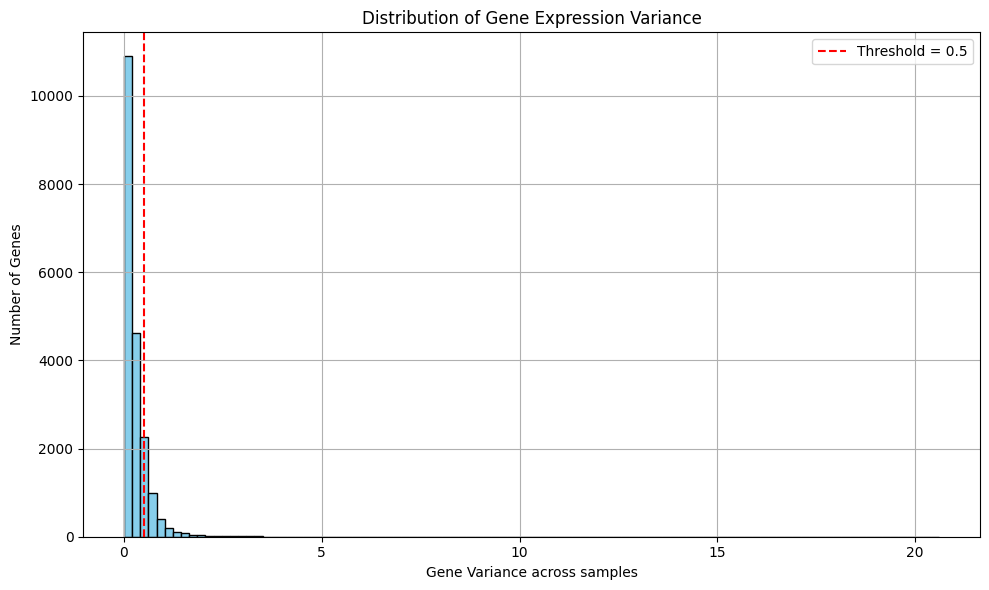

In [ ]:
# 1. 重新計算每個基因的變異性（在轉置前就能算）
gene_variances = df_T.var(axis=0)  # 對每一欄（即每個 gene）計算變異性

# 2. 畫出變異性分布圖
plt.figure(figsize=(10, 6))
plt.hist(gene_variances, bins=100, color='skyblue', edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')  # 加上你的門檻線
plt.xlabel('Gene Variance across samples')
plt.ylabel('Number of Genes')
plt.title('Distribution of Gene Expression Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
filtered_df

gene,GSTM1,RPS4Y1,CFHR1,ZBTB20,AOC1,SMIM24,CFHR3,AKR1B10,PZP,XPNPEP2,...,SERPINB9,JAG1,PLEKHA4,YY2,FAM78B,ZNF334,CYP3A7-CYP3A51P,SLC11A1,ARHGEF35,HJURP
Normal_weight_1,3.661318,10.155229,13.350832,7.107514,2.388474,9.766313,10.421066,4.571464,5.019200,10.749939,...,6.790651,7.385052,7.478004,3.092903,3.513009,3.957570,2.388474,3.707550,4.235143,2.867122
Obese_1,12.023007,10.451913,12.958124,7.126310,3.384127,3.996483,9.906144,3.771975,6.550098,9.595532,...,6.605674,6.820556,7.806705,2.757075,4.226607,3.722554,3.563241,4.514857,2.757075,2.757075
Normal_weight_2,2.851760,10.407771,13.341538,7.066517,7.107503,10.074727,12.668836,2.000000,6.936073,9.647933,...,6.958649,6.706347,7.337367,3.291876,4.233160,4.182910,2.717001,4.130847,3.771507,2.851760
Obese_2,3.264780,10.505715,11.569136,6.614631,8.310837,7.631558,8.629765,3.634295,5.548085,10.460466,...,6.518560,6.225867,6.415632,3.037156,3.155453,3.366402,2.609839,3.713573,3.860147,2.433735
Normal_weight_3,12.184096,10.577117,13.217339,6.823555,8.090823,2.681380,11.876073,2.811135,4.616173,7.388838,...,6.660941,7.229672,7.454859,3.237725,3.771755,4.426701,2.930176,3.491093,3.893955,2.681380
Obese_3,3.346629,9.987547,13.234753,6.881594,2.642613,8.395595,12.055806,2.506770,3.346629,7.316866,...,6.533910,5.854762,6.767333,4.172235,3.874002,4.216454,2.986971,4.341520,3.424095,2.189399
Normal_weight_4,12.633055,10.276433,11.741278,6.573433,7.852333,3.959203,9.776950,3.429344,3.318483,9.797118,...,6.511780,6.994433,6.791473,3.429344,3.883334,4.958465,2.763171,3.803252,3.718463,2.377187
Obese_4,11.590442,10.475299,13.663629,6.929582,3.235849,3.011781,10.971300,4.604545,9.821024,9.234387,...,6.231662,6.984652,7.509448,2.885183,3.753433,4.240863,3.235849,4.388189,3.235849,2.746398
Normal_weight_5,5.058704,10.278438,13.670394,7.334945,7.610360,5.124021,10.760869,6.940864,3.452375,10.283807,...,6.214030,6.198951,8.110877,2.974359,3.109509,4.842881,2.470831,4.678680,3.810812,2.254538
Normal_weight_6,3.879381,10.041981,12.567578,7.377481,4.152069,9.933229,10.314200,3.103139,5.619506,11.181069,...,6.290043,7.492332,8.476218,2.467529,3.444839,4.271242,3.226253,3.952535,3.802318,2.654535


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# 1. 建立原始類別標籤（Normal, Obese, NAFL, NASH）
def label_mapper(x):
    if "Normal" in x:
        return "Normal"
    elif "Obese" in x:
        return "Obese"
    elif "NAFL" in x:
        return "NAFL"
    elif "NASH" in x:
        return "NASH"
    else:
        return "Unknown"

labels = df_T.index.to_series().apply(label_mapper)
# 2. 使用 LabelEncoder 轉成數值
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# 3. 查看數值與原始標籤的對應
print("編碼對應關係：")
for idx, class_name in enumerate(le.classes_):
    print(f"{idx} ➝ {class_name}")

編碼對應關係：
0 ➝ NAFL
1 ➝ NASH
2 ➝ Normal
3 ➝ Obese


In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_df)
X_scaled

array([[-0.69030537,  0.34193715,  0.39721027, ..., -0.8764744 ,
         0.67709902, -0.10289072],
       [ 1.1678965 ,  0.43754965,  0.25219232, ...,  0.26483384,
        -1.41253963, -0.25848793],
       [-0.87021195,  0.42332372,  0.39377822, ..., -0.27804982,
         0.02162766, -0.12461121],
       ...,
       [-0.87855569,  0.33452903,  0.34318679, ...,  0.69769293,
        -1.05779132, -0.86921365],
       [ 1.19823824,  0.47847462, -2.6754154 , ...,  0.59969215,
         0.07763246,  1.01204659],
       [-0.50927194, -1.82251501,  0.09258105, ..., -0.0108088 ,
         0.79689819, -0.40826067]])

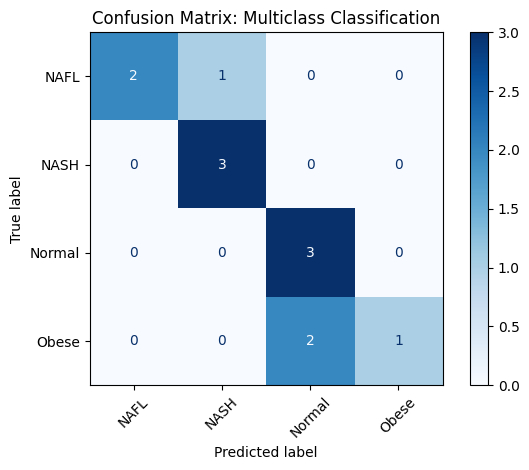

              precision    recall  f1-score   support

        NAFL       1.00      0.67      0.80         3
        NASH       0.75      1.00      0.86         3
      Normal       0.60      1.00      0.75         3
       Obese       1.00      0.33      0.50         3

    accuracy                           0.75        12
   macro avg       0.84      0.75      0.73        12
weighted avg       0.84      0.75      0.73        12



In [ ]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import classification_report

# 分割訓練/測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 建立 confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 畫出帶標籤的圖
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix: Multiclass Classification")
plt.tight_layout()
plt.show()


print(classification_report(y_test, y_pred, target_names=le.classes_))


In [ ]:
X_scaled.shape

(57, 3004)

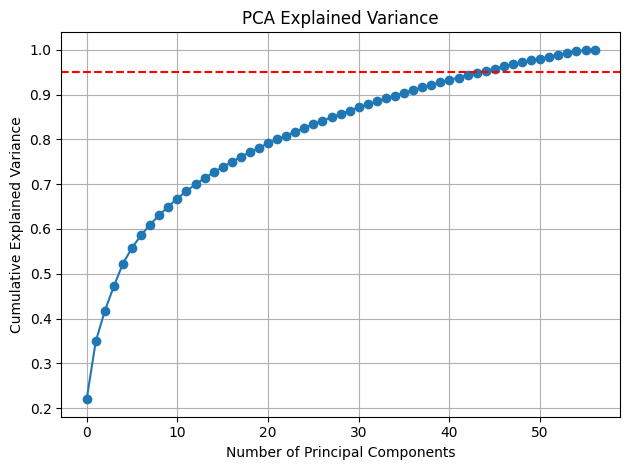

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import numpy as np

pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.title("PCA Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--')
plt.tight_layout()
plt.show()


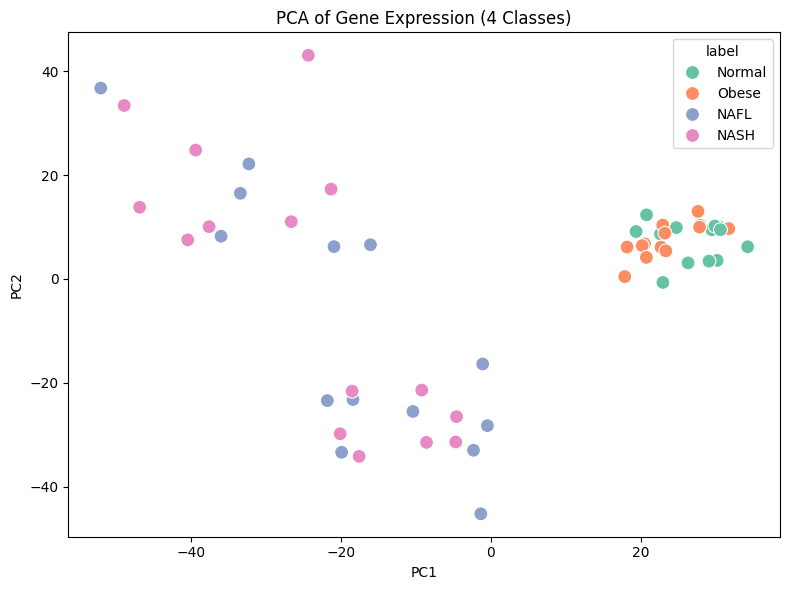

In [ ]:
# from sklearn.decomposition import PCA
# import seaborn as sns
# import matplotlib.pyplot as plt

# 假設你已經有 X_scaled（標準化後的樣本 × 基因資料）和 labels（原始文字標籤）

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 放到 dataframe 中方便繪圖
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = labels.values

# 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2', s=100)
plt.title('PCA of Gene Expression (4 Classes)')
plt.tight_layout()
plt.show()


In [ ]:
pc1_weights = pca.components_[0]
top_idx = np.argsort(np.abs(pc1_weights))[-10:][::-1]
top_genes = filtered_df.columns[top_idx]
print("PC1 最重要的前10個基因：", top_genes.tolist())

PC1 最重要的前10個基因： [' TIMD4', ' CETP', ' LYVE1', ' KDR', ' PRAP1', ' MRC1', ' SEC14L1', ' PET100', ' EHD3', ' P2RY13']


# VAE

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np

In [ ]:
# 假設你已經有 filtered_df 作為輸入資料
scaled_data_VAE=X_scaled
scaled_data_VAE.astype("float32")
print(scaled_data_VAE)
print(scaled_data_VAE)
input_dim = scaled_data_VAE.shape[1]
latent_dim = 10

# -----------------------
# 1. Encoder
# -----------------------
encoder_inputs = tf.keras.Input(shape=(input_dim,), name='encoder_input')
x = layers.Dense(256, activation='relu')(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)  # 額外的瓶頸層
x = layers.BatchNormalization()(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# 重參數化技巧
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
display(encoder.summary())
# -----------------------
# 2. Decoder
# -----------------------
decoder_inputs = tf.keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(64, activation='relu')(decoder_inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
decoder_outputs = layers.Dense(input_dim, activation='linear')(x)
decoder = tf.keras.Model(decoder_inputs, decoder_outputs, name='decoder')
display(decoder.summary())
# -----------------------
# 3. VAE Class
# -----------------------
class VAE(Model):
    def __init__(self, encoder, decoder, beta_max=0.1, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta_max = beta_max
        self.global_step = tf.Variable(0.0, trainable=False, dtype=tf.float32)
        self.loss_tracker = tf.keras.metrics.Mean(name='loss')
        self.recon_tracker = tf.keras.metrics.Mean(name='recon_loss')
        self.kl_tracker = tf.keras.metrics.Mean(name='kl_loss')

    def compute_beta(self):
        # return tf.minimum(self.beta_max, self.global_step / 20000.0 * self.beta_max)
        step = self.global_step
        k = 0.01       # 控制上升速度
        midpoint = 400.0  # 在第 400 步時達到一半強度
        return self.beta_max / (1 + tf.exp(-k * (step - midpoint)))
        # cycle = tf.floor(self.global_step / 10000.0)
        # relative_step = (self.global_step % 10000) / 10000.0
        # beta = self.beta_max * tf.minimum(relative_step * 2, 0.5 * (tf.cos(relative_step * 3.14159) + 1))
        # return beta
    def call(self, inputs):
        _, _, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, x):
        beta = self.compute_beta()
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x)
            z_log_var = tf.clip_by_value(z_log_var, -5.0, 5.0)
            x_recon = self.decoder(z)
            # 使用 MSE 做重建（適合連續數值資料）
            recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - x_recon), axis=1))
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
            ))
            total_loss = recon_loss + beta * kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        self.global_step.assign_add(1.0)

        self.loss_tracker.update_state(total_loss)
        self.recon_tracker.update_state(recon_loss)
        self.kl_tracker.update_state(kl_loss)

        return {
            "loss": self.loss_tracker.result(),
            "recon_loss": self.recon_tracker.result(),
            "kl_loss": self.kl_tracker.result()
        }

    def test_step(self, x):
        z_mean, z_log_var, z = self.encoder(x)
        z_log_var = tf.clip_by_value(z_log_var, -5.0, 5.0)
        x_recon = self.decoder(z)
        recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - x_recon), axis=1))
        kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
        ))
        total_loss = recon_loss + self.beta_max * kl_loss

        self.loss_tracker.update_state(total_loss)
        self.recon_tracker.update_state(recon_loss)
        self.kl_tracker.update_state(kl_loss)

        return {
            "loss": self.loss_tracker.result(),
            "recon_loss": self.recon_tracker.result(),
            "kl_loss": self.kl_tracker.result()
        }

    @property
    def metrics(self):
        return [self.loss_tracker, self.recon_tracker, self.kl_tracker]


[[-0.69030537  0.34193715  0.39721027 ... -0.8764744   0.67709902
  -0.10289072]
 [ 1.1678965   0.43754965  0.25219232 ...  0.26483384 -1.41253963
  -0.25848793]
 [-0.87021195  0.42332372  0.39377822 ... -0.27804982  0.02162766
  -0.12461121]
 ...
 [-0.87855569  0.33452903  0.34318679 ...  0.69769293 -1.05779132
  -0.86921365]
 [ 1.19823824  0.47847462 -2.6754154  ...  0.59969215  0.07763246
   1.01204659]
 [-0.50927194 -1.82251501  0.09258105 ... -0.0108088   0.79689819
  -0.40826067]]
[[-0.69030537  0.34193715  0.39721027 ... -0.8764744   0.67709902
  -0.10289072]
 [ 1.1678965   0.43754965  0.25219232 ...  0.26483384 -1.41253963
  -0.25848793]
 [-0.87021195  0.42332372  0.39377822 ... -0.27804982  0.02162766
  -0.12461121]
 ...
 [-0.87855569  0.33452903  0.34318679 ...  0.69769293 -1.05779132
  -0.86921365]
 [ 1.19823824  0.47847462 -2.6754154  ...  0.59969215  0.07763246
   1.01204659]
 [-0.50927194 -1.82251501  0.09258105 ... -0.0108088   0.79689819
  -0.40826067]]


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 3004)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    769,280 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 10)        │        650 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 10)        │        650 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 10)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 813,524 (3.10 MB)

 Trainable params: 812,628 (3.10 MB)

 Non-trainable params: 896 (3.50 KB)

None

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3004)           │       772,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,588 (3.11 MB)

 Trainable params: 814,332 (3.11 MB)

 Non-trainable params: 256 (1.00 KB)

None

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
vae = VAE(encoder, decoder, beta_max=0.2)
vae.compile(optimizer=tf.keras.optimizers.Adam(1e-4))
history = vae.fit(scaled_data_VAE, epochs=100, batch_size=4, validation_split=0.1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - kl_loss: 4.5503 - loss: 3193.5007 - recon_loss: 3193.4839 - val_kl_loss: 6.3701 - val_loss: 4132.2910 - val_recon_loss: 4131.0171
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - kl_loss: 3.7092 - loss: 2946.5479 - recon_loss: 2946.5325 - val_kl_loss: 6.8035 - val_loss: 4143.1841 - val_recon_loss: 4141.8232
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - kl_loss: 4.2187 - loss: 3039.5488 - recon_loss: 3039.5283 - val_kl_loss: 7.1328 - val_loss: 4131.5791 - val_recon_loss: 4130.1523
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - kl_loss: 6.2306 - loss: 2700.2788 - recon_loss: 2700.2446 - val_kl_loss: 11.8209 - val_loss: 4124.0283 - val_recon_loss: 4121.6646
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - kl_loss: 12.0188 - loss: 2886.9856 - recon_loss: 2886.9106 - val_kl_loss: 30.7821 - val_loss: 4096.7578 - val_recon_loss: 4090.6018
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - kl_loss: 34.7201 - l

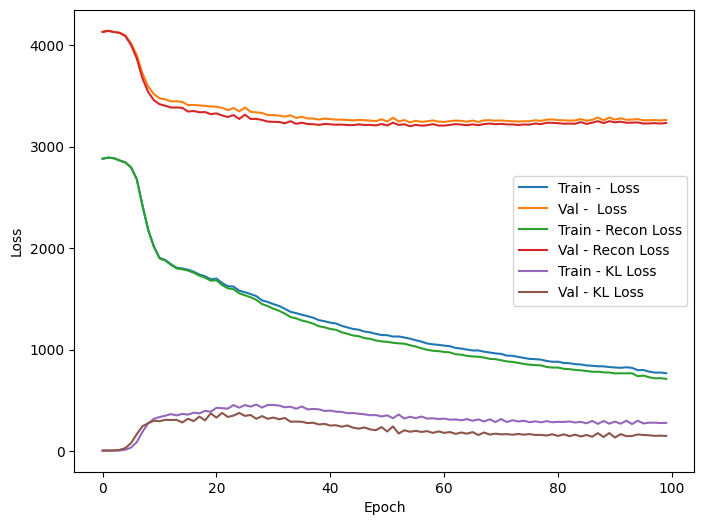

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],          label='Train -  Loss')
plt.plot(history.history['val_loss'],      label='Val -  Loss')
plt.plot(history.history['recon_loss'],    label='Train - Recon Loss')
plt.plot(history.history['val_recon_loss'],label='Val - Recon Loss')
plt.plot(history.history['kl_loss'],       label='Train - KL Loss')
plt.plot(history.history['val_kl_loss'],   label='Val - KL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


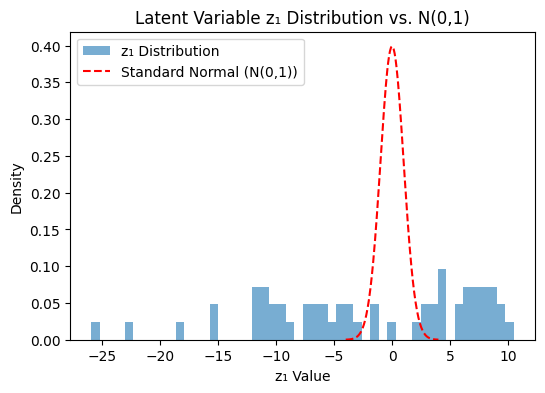

In [ ]:
from scipy.stats import norm
z_mean, _, _ = encoder.predict(X_scaled)
z1 = z_mean[:, 0] # z_all (57,10)

plt.figure(figsize=(6, 4))

plt.hist(z1, bins=50, density=True, alpha=0.6, label='z₁ Distribution')

x_vals = np.linspace(-4, 4, 200)
plt.plot(x_vals, norm.pdf(x_vals), 'r--', label='Standard Normal (N(0,1))')

plt.title('Latent Variable z₁ Distribution vs. N(0,1)')
plt.xlabel('z₁ Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

latent_dim = 10
num_samples = 57  # 想生成幾筆新資料

# 1. 從標準常態分布抽樣 latent vector z
z_samples = np.random.normal(loc=0.0, scale=1.0, size=(num_samples, latent_dim))

# 2. 使用訓練好的 decoder 產生對應的輸出（模擬 gene expression）
generated_data_norm = decoder.predict(z_samples)

# # 用原本資料的 mean / std 做還原
# gene_means = filtered_df.mean().values   # shape = (num_genes,)
# gene_stds = filtered_df.std().values     # shape = (num_genes,)

# # 還原
# generated_original = generated_data * gene_stds + gene_means
# generated_df = pd.DataFrame(generated_original, columns=filtered_df.columns)
original_scale_data_norm_VAE = scaler.inverse_transform(generated_data_norm)
generated_df_norm_VAE = pd.DataFrame(original_scale_data_norm_VAE, columns=filtered_df.columns)

print(generated_df_norm_VAE.shape)
print(generated_df_norm_VAE.head())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
(57, 3004)
gene     GSTM1    RPS4Y1      CFHR1    ZBTB20      AOC1    SMIM24      CFHR3  \
0     6.981662  9.588296  12.236950  7.342992  6.042386  7.131608  10.113276   
1     7.431176  9.280803  12.416756  7.088893  6.140102  6.927717  10.509383   
2     7.001417  9.322294  12.252200  7.272305  5.974494  7.047656  10.124966   
3     6.487907  9.058533  12.346722  6.911161  6.025728  7.227257  10.313109   
4     6.508949  9.200876  12.375248  7.335023  6.102034  7.058995  10.271924   

gene   AKR1B10       PZP   XPNPEP2  ...  SERPINB9      JAG1   PLEKHA4  \
0     5.531263  6.266134  8.603039  ...  5.990829  6.688692  7.665592   
1     5.614393  6.430140  8.688642  ...  5.930664  6.573573  7.779653   
2     5.602808  6.380121  8.555111  ...  5.985868  6.631747  7.633683   
3     5.798567  6.767560  8.554207  ...  5.917251  6.586905  7.691548   
4     5.742618  6.576029  8.534915  ...  6.024639  6.649856  7.581827   

gene       YY2    FAM78B    ZN

In [ ]:
# ===== 1. 生成 fake samples =====
# 這裡用真實的 z 分佈來抽樣，比直接 N(0,1) 更自然
z_mean_all, z_log_var_all, _ = encoder.predict(X_scaled)
mu = z_mean_all.mean(axis=0)
sigma = z_mean_all.std(axis=0)

n_fake = X_scaled.shape[0]
z_sample = mu + np.random.randn(n_fake, latent_dim) * sigma
X_fake_VAE = decoder.predict(z_sample)

X_fake_ori_VAE = scaler.inverse_transform(X_fake_VAE)
X_fake_df_VAE = pd.DataFrame(X_fake_ori_VAE, columns=filtered_df.columns)

print(X_fake_df_VAE.shape)
print(X_fake_df_VAE.head())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(57, 3004)
gene     GSTM1    RPS4Y1      CFHR1    ZBTB20      AOC1    SMIM24      CFHR3  \
0     6.612591  9.863591  12.028842  8.161722  7.152015  7.036627  10.369456   
1     3.941770  7.186095  13.700903  4.965990  6.276118  7.227945  11.608590   
2     6.879379  6.401533  10.686533  7.298876  8.442275  5.040889  10.994606   
3     7.114624  7.578701  10.177724  8.283133  6.665326  7.593811   8.593165   
4     4.383593  9.888008  13.549459  5.321014  5.687599  7.508870  10.452071   

gene   AKR1B10       PZP   XPNPEP2  ...  SERPINB9      JAG1   PLEKHA4  \
0     3.730324  6.091230  9.025915  ...  6.572790  6.779590  7.779991   
1     7.490630  8.839512  8.206824  ...  5.862223  6.559353  6.996159   
2     2.450775  8.556568  5.831138  ...  6.028057  4.612616  8.602314   
3     6.822919  6.776956  8.451472  ...  6.374743  6.608051  7.967385   
4     6.402113  7.581653  8.111840  ...  6.063293  6.875386  7.6852

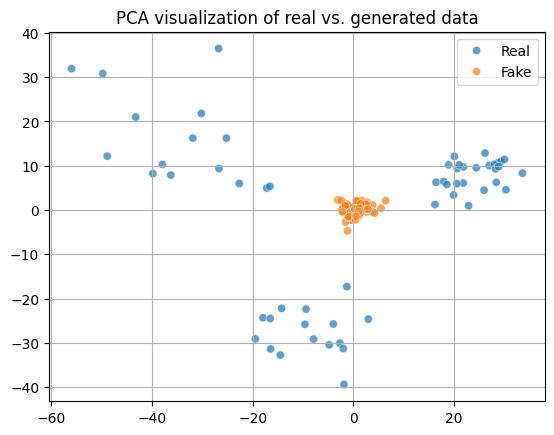

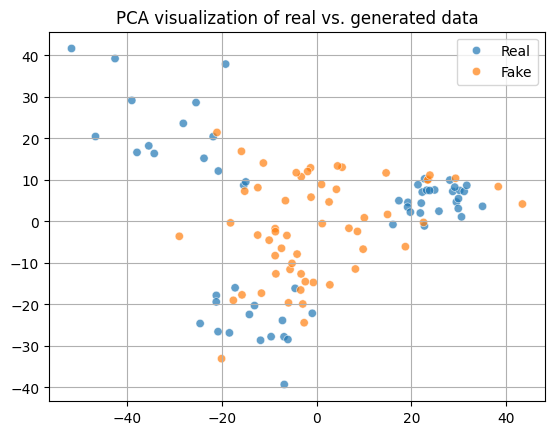

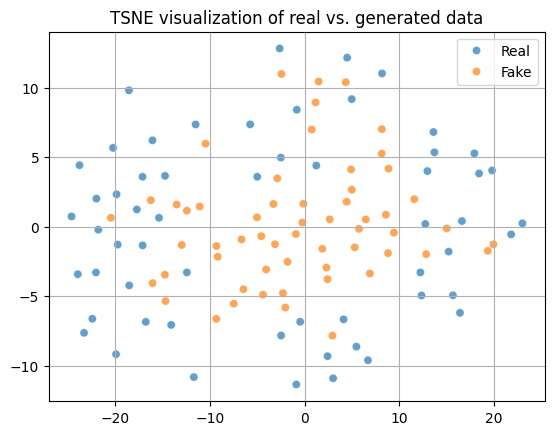

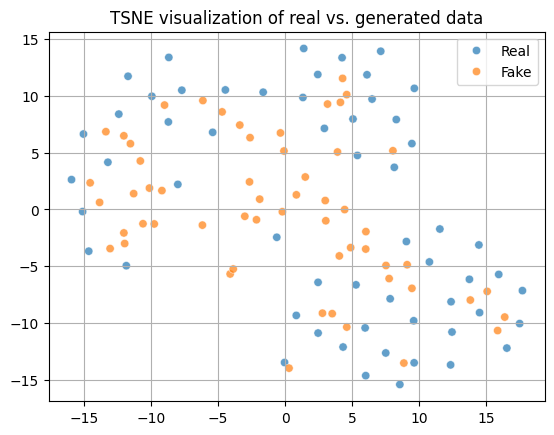

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
real_data = filtered_df.values
fake_data_norm_VAE = generated_df_norm_VAE.values # inverse transform過
fake_data_VAE = X_fake_df_VAE.values # inverse transform過

def visualize_pca_tsne(real, fake, method='pca'):
    data = np.concatenate([real, fake])
    labels = ['Real'] * len(real) + ['Fake'] * len(fake)

    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=10)

    reduced = reducer.fit_transform(data)
    sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=labels, alpha=0.7)
    plt.title(f'{method.upper()} visualization of real vs. generated data')
    plt.grid(True)
    plt.show()
visualize_pca_tsne(real_data, fake_data_norm_VAE, method='pca')
visualize_pca_tsne(real_data, fake_data_VAE, method='pca')
visualize_pca_tsne(real_data, fake_data_norm_VAE, method='tsne')
visualize_pca_tsne(real_data, fake_data_VAE, method='tsne')

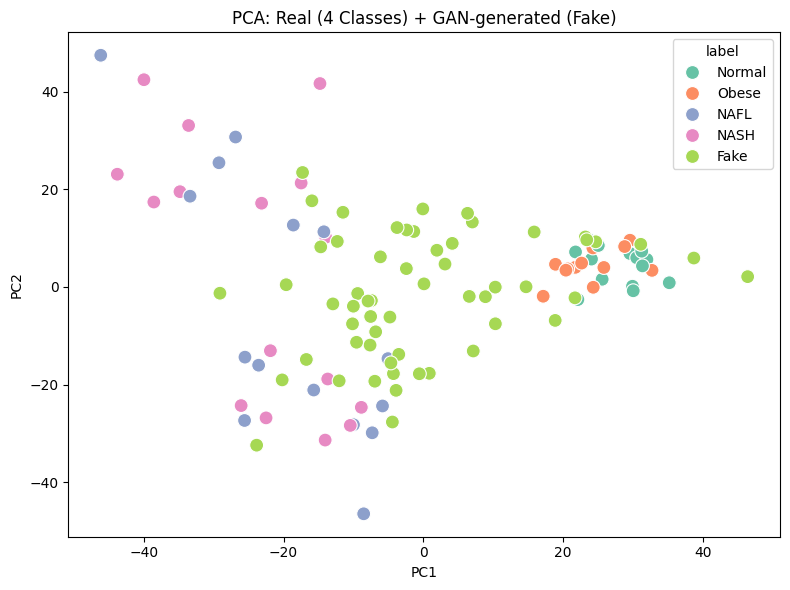

In [ ]:
# 1. 將 label 加上 'Fake' 類別
real_labels = labels.copy()
fake_labels = pd.Series(['Fake'] * X_fake_VAE.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, X_fake_VAE])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels], ignore_index=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_data)

# 4. 建 DataFrame 繪圖
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = combined_labels

# 5. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2', s=100)
plt.title('PCA: Real (4 Classes) + VAE-generated (Fake)')
plt.tight_layout()
plt.show()

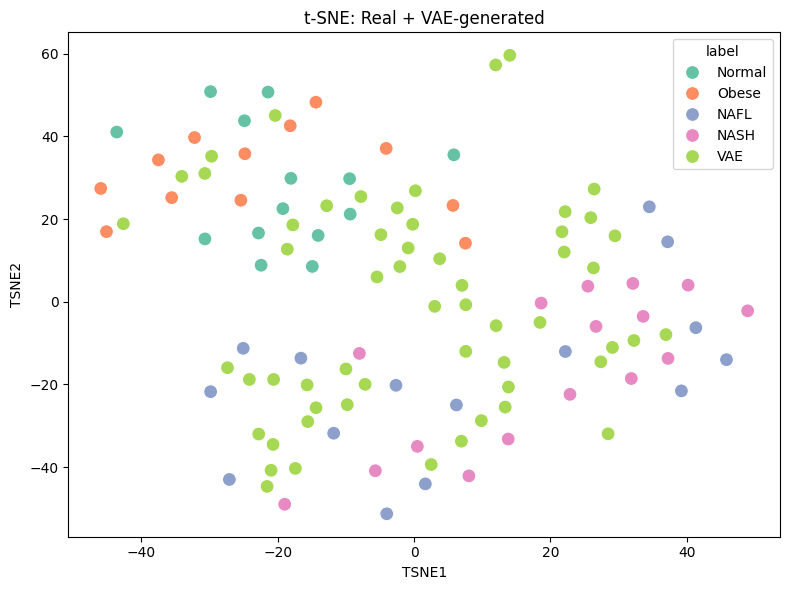

In [ ]:
real_labels = labels.copy()
fake_labels = pd.Series(['VAE'] * X_fake_VAE.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, X_fake_VAE])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels], ignore_index=True)
# 1. 建立 t-SNE 模型
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, random_state=42)

# 2. 降維
X_tsne = tsne.fit_transform(combined_data)

# 3. 放入 DataFrame 繪圖
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = combined_labels

# 4. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='label', palette='Set2', s=100)
plt.title('t-SNE: Real + VAE-generated')
plt.tight_layout()
plt.show()

In [ ]:
#generated_data_norm
X_all_norm = np.vstack([X_scaled, generated_data_norm])
y_all_norm = np.array([1] * len(X_scaled) + [0] * len(generated_data_norm))  # 1=Real, 0=Fake

# # ===== 3. 做 PCA 降維（你也可以 skip） =====
# pca = PCA(n_components=30)
# X_pca = pca.fit_transform(X_all)

# ===== 4. 分訓練與測試集 =====
X_train, X_test, y_train, y_test = train_test_split(X_all_norm, y_all_norm, test_size=0.2, stratify=y_all_norm)

# ===== 5. 建立分類器並訓練 =====
clf_norm = LogisticRegression(max_iter=1000)
clf_norm.fit(X_train, y_train)

# ===== 6. 評估模型效能 =====
y_pred = clf_norm.predict(X_test)
y_prob = clf_norm.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"\n🎯 Accuracy: {acc:.3f}")

print("Confusion Matrix:")
print(cm)


🎯 Accuracy: 0.522
Confusion Matrix:
[[12  0]
 [11  0]]


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

X_all_VAE = np.vstack([X_scaled, X_fake_VAE])
y_all_VAE = np.array([1] * len(X_scaled) + [0] * len(X_fake_VAE))  # 1=Real, 0=Fake

# # ===== 3. 做 PCA 降維（你也可以 skip） =====
# pca = PCA(n_components=30)
# X_pca = pca.fit_transform(X_all)

# ===== 4. 分訓練與測試集 =====
X_train, X_test, y_train, y_test = train_test_split(X_all_VAE, y_all_VAE, test_size=0.2, stratify=y_all_VAE)

# ===== 5. 建立分類器並訓練 =====
clf_VAE = LogisticRegression(max_iter=1000)
clf_VAE.fit(X_train, y_train)

# ===== 6. 評估模型效能 =====
y_pred = clf_VAE.predict(X_test)
y_prob = clf_VAE.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"\n🎯 Accuracy: {acc:.3f}")

print("Confusion Matrix:")
print(cm)


🎯 Accuracy: 0.478
Confusion Matrix:
[[10  2]
 [10  1]]


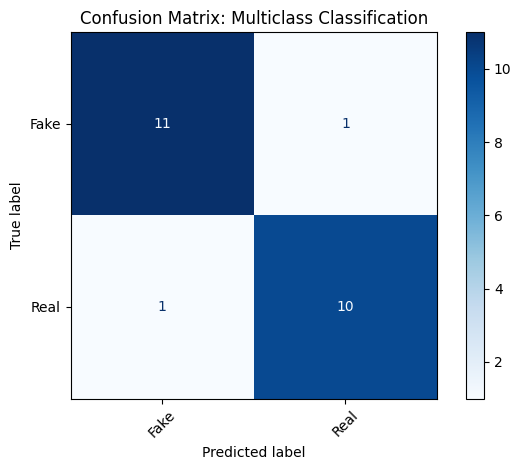

              precision    recall  f1-score   support

        Fake       0.92      0.92      0.92        12
        Real       0.91      0.91      0.91        11

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [ ]:

rfc_VAE = RandomForestClassifier(random_state=0)
rfc_VAE.fit(X_train, y_train)

# 預測測試集
y_pred = rfc_VAE.predict(X_test)

# 建立 confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 畫出帶標籤的圖
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix: Multiclass Classification")
plt.tight_layout()
plt.show()


print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

# GAN

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
scaled_data_GAN=X_scaled
scaled_data_GAN

array([[-0.69030537,  0.34193715,  0.39721027, ..., -0.8764744 ,
         0.67709902, -0.10289072],
       [ 1.1678965 ,  0.43754965,  0.25219232, ...,  0.26483384,
        -1.41253963, -0.25848793],
       [-0.87021195,  0.42332372,  0.39377822, ..., -0.27804982,
         0.02162766, -0.12461121],
       ...,
       [-0.87855569,  0.33452903,  0.34318679, ...,  0.69769293,
        -1.05779132, -0.86921365],
       [ 1.19823824,  0.47847462, -2.6754154 , ...,  0.59969215,
         0.07763246,  1.01204659],
       [-0.50927194, -1.82251501,  0.09258105, ..., -0.0108088 ,
         0.79689819, -0.40826067]])

In [ ]:
batch_size = 4
dataset = tf.data.Dataset.from_tensor_slices(scaled_data_GAN.astype('float32')).batch(batch_size)

In [ ]:
def build_generator():
  initializer = tf.keras.initializers.RandomNormal(stddev=0.02)
  model = tf.keras.Sequential([
      layers.Dense(64,use_bias=False,input_shape=(100,),kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      layers.Dense(128,use_bias=False,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      layers.Dense(256,use_bias=False,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      # layers.Dense(512,use_bias=False,kernel_initializer=initializer),
      # layers.BatchNormalization(),
      # layers.LeakyReLU(),


      layers.Dense(3004,activation='linear',kernel_initializer=initializer)
  ])
  return model

In [ ]:
def build_discriminator():
  initializer = tf.keras.initializers.RandomNormal(stddev=0.02)
  model = tf.keras.Sequential([
      layers.Input(shape=(3004,)),

      layers.Dense(256, use_bias=False, kernel_initializer=initializer),
      layers.LeakyReLU(),
      layers.Dropout(0.3),

      layers.Dense(128, use_bias=False, kernel_initializer=initializer),
      layers.LeakyReLU(),
      layers.Dropout(0.3),

      layers.Dense(64, use_bias=False, kernel_initializer=initializer),
      layers.LeakyReLU(),
      layers.Dropout(0.3),

      layers.Dense(1)
  ])
  return model

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [ ]:
generator = build_generator()
discriminator = build_discriminator()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
gen_losses = []
disc_losses = []

epochs = 100
noise_dim = 100
# num_examples_to_generate = 4
# seed = tf.random.normal([num_examples_to_generate, noise_dim])

# @tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [ ]:
def plot_metrics():
    plt.figure(figsize=(8, 4))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def train(dataset, epochs):
    for epoch in range(1, epochs + 1):
        total_gen_loss = 0
        total_disc_loss = 0
        num_batches = 0
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            total_gen_loss += gen_loss
            total_disc_loss += disc_loss
            num_batches += 1

        avg_gen_loss = total_gen_loss / num_batches
        avg_disc_loss = total_disc_loss / num_batches
        gen_losses.append(avg_gen_loss)
        disc_losses.append(avg_disc_loss)

        # if epoch % 5 == 0 or epoch == 1:
        #     generate_table(generator, seed)
        print(f"Epoch {epoch:03d} | Gen Loss: {avg_gen_loss:.4f} | Disc Loss: {avg_disc_loss:.4f}")

    plot_metrics()

Epoch 001 | Gen Loss: 0.6739 | Disc Loss: 1.4064
Epoch 002 | Gen Loss: 0.6363 | Disc Loss: 1.3566
Epoch 003 | Gen Loss: 0.6016 | Disc Loss: 1.3166
Epoch 004 | Gen Loss: 0.5956 | Disc Loss: 1.2410
Epoch 005 | Gen Loss: 0.5905 | Disc Loss: 1.1758
Epoch 006 | Gen Loss: 0.6125 | Disc Loss: 1.0390
Epoch 007 | Gen Loss: 0.6475 | Disc Loss: 0.9806
Epoch 008 | Gen Loss: 0.6803 | Disc Loss: 0.9344
Epoch 009 | Gen Loss: 0.6909 | Disc Loss: 0.9398
Epoch 010 | Gen Loss: 0.6766 | Disc Loss: 0.9816
Epoch 011 | Gen Loss: 0.6842 | Disc Loss: 1.0388
Epoch 012 | Gen Loss: 0.6895 | Disc Loss: 1.0610
Epoch 013 | Gen Loss: 0.8156 | Disc Loss: 0.9199
Epoch 014 | Gen Loss: 0.9866 | Disc Loss: 0.7872
Epoch 015 | Gen Loss: 0.9716 | Disc Loss: 0.7724
Epoch 016 | Gen Loss: 1.0503 | Disc Loss: 0.7533
Epoch 017 | Gen Loss: 1.2163 | Disc Loss: 0.7012
Epoch 018 | Gen Loss: 1.4235 | Disc Loss: 0.5462
Epoch 019 | Gen Loss: 1.4601 | Disc Loss: 0.5852
Epoch 020 | Gen Loss: 1.6371 | Disc Loss: 0.5618
Epoch 021 | Gen Loss

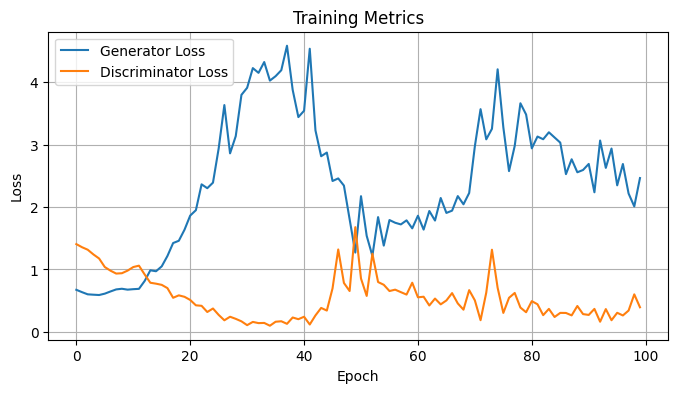

In [ ]:
train(dataset, epochs)

In [ ]:
seed = tf.random.normal([57, noise_dim])
predictions = generator(seed, training=False).numpy()
original_scale_data_GAN = scaler.inverse_transform(predictions)
generated_df_GAN = pd.DataFrame(original_scale_data_GAN, columns=filtered_df.columns)
display(generated_df_GAN.shape)

(57, 3004)

In [ ]:
generated_df_GAN

gene,GSTM1,RPS4Y1,CFHR1,ZBTB20,AOC1,SMIM24,CFHR3,AKR1B10,PZP,XPNPEP2,...,SERPINB9,JAG1,PLEKHA4,YY2,FAM78B,ZNF334,CYP3A7-CYP3A51P,SLC11A1,ARHGEF35,HJURP
0,9.566428,11.509807,11.692676,8.208798,6.034505,6.769267,9.840892,4.161435,7.810241,8.605346,...,6.440598,6.732552,7.330099,3.009522,3.101019,4.065780,3.175113,3.809004,3.639269,2.641638
1,10.812520,10.017696,11.552935,7.549132,6.499195,3.858809,10.990211,2.988721,6.524346,9.381262,...,6.256007,6.154275,8.194183,3.204134,2.741923,4.221610,2.871941,4.240514,3.607549,2.635102
2,10.308336,14.500561,14.029170,8.076943,4.998489,6.400105,9.318595,3.473232,7.065683,9.772569,...,6.653992,6.604869,7.684175,2.916950,3.015146,3.527987,3.184955,3.650372,3.607424,2.488689
3,7.032301,10.158141,12.544588,6.663319,6.011678,6.823190,10.568273,4.532825,6.595935,8.778131,...,6.268708,6.450086,7.687792,3.349873,3.395205,4.033254,3.059304,4.094187,3.751456,2.855504
4,7.987648,10.598641,11.529936,8.111685,6.190244,6.340915,10.196938,4.677411,5.431605,9.289549,...,5.955039,6.166829,7.945876,3.086720,3.243074,4.014202,2.993019,4.098955,3.895463,2.755278
5,8.032950,12.406549,12.587816,6.888902,5.987138,4.565673,11.650872,3.416425,5.977284,11.320963,...,6.130342,5.863446,7.912543,3.262285,3.324851,4.080268,2.983151,3.841706,3.676143,2.859398
6,9.583466,14.021877,12.299750,7.643017,5.685805,6.638696,9.149860,3.328875,6.993633,9.262552,...,6.700307,6.587994,7.515365,2.614495,3.272431,3.540860,3.180535,3.359728,3.745585,2.317755
7,11.436870,11.786229,13.736117,5.940177,6.888756,4.510791,10.462966,2.808106,6.630697,9.294339,...,6.050172,5.801390,8.079249,2.891500,3.011658,3.988550,2.942017,3.708691,3.565059,2.378032
8,8.564598,10.477783,12.389821,6.845266,6.333074,5.674252,10.633373,4.127372,6.262939,9.526913,...,6.239306,6.234546,7.782407,2.967334,3.474773,4.070589,2.816392,4.009872,3.680732,2.745406
9,7.695437,9.953857,11.397449,7.500385,5.921474,6.151342,10.210674,3.988584,7.114182,9.576964,...,6.054462,6.530587,7.601271,3.098413,3.569463,4.182478,2.959160,4.123970,3.682333,2.835459


In [ ]:
real_data = filtered_df.values
fake_data_GAN = generated_df_GAN.values

In [ ]:
print(real_data.shape)
print(fake_data_GAN.shape)

(57, 3004)
(57, 3004)


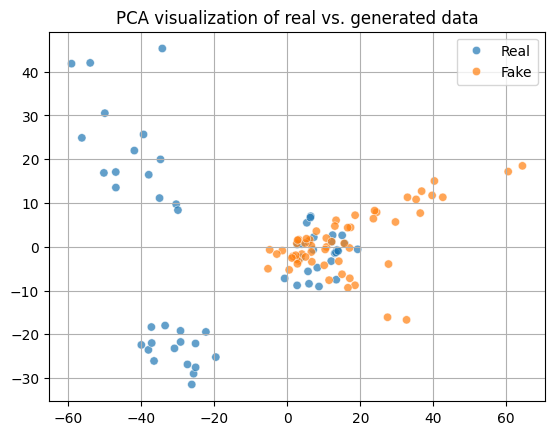

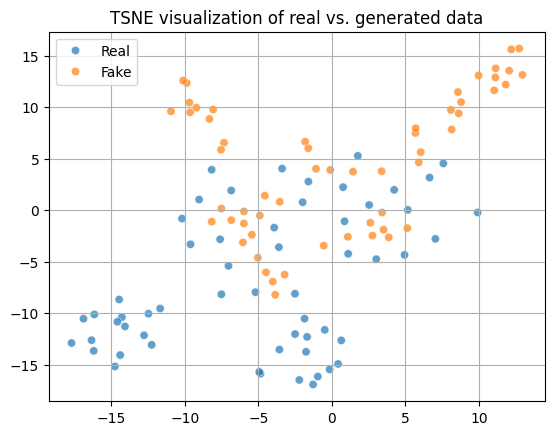

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
def visualize_pca_tsne(real, fake, method='pca'):
    data = np.concatenate([real, fake])
    labels = ['Real'] * len(real) + ['Fake'] * len(fake)

    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=10)

    reduced = reducer.fit_transform(data)
    sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=labels, alpha=0.7)
    plt.title(f'{method.upper()} visualization of real vs. generated data')
    plt.grid(True)
    plt.show()
visualize_pca_tsne(real_data, fake_data_GAN, method='pca')
visualize_pca_tsne(real_data, fake_data_GAN, method='tsne')

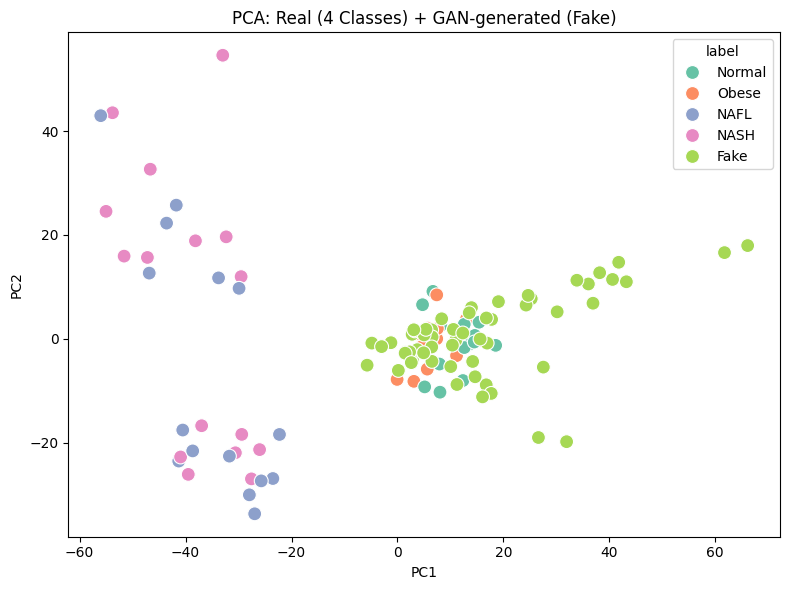

In [ ]:
# 1. 將 label 加上 'Fake' 類別
real_labels = labels.copy()
fake_labels = pd.Series(['Fake'] * predictions.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, predictions])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels], ignore_index=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_data)

# 4. 建 DataFrame 繪圖
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = combined_labels

# 5. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2', s=100)
plt.title('PCA: Real (4 Classes) + GAN-generated (Fake)')
plt.tight_layout()
plt.show()

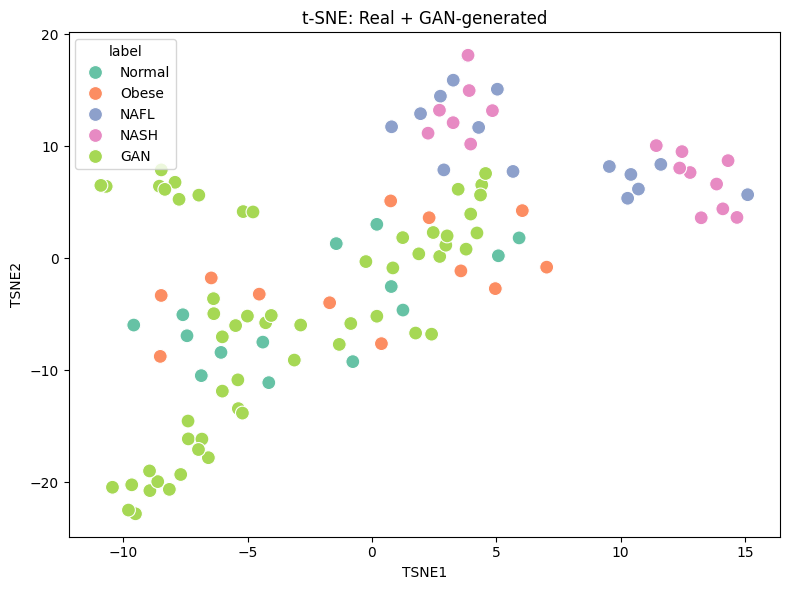

In [ ]:
real_labels = labels.copy()
fake_labels = pd.Series(['GAN'] * predictions.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, predictions])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels], ignore_index=True)
# 1. 建立 t-SNE 模型
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, random_state=42)

# 2. 降維
X_tsne = tsne.fit_transform(combined_data)

# 3. 放入 DataFrame 繪圖
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = combined_labels

# 4. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='label', palette='Set2', s=100)
plt.title('t-SNE: Real + GAN-generated')
plt.tight_layout()
plt.show()

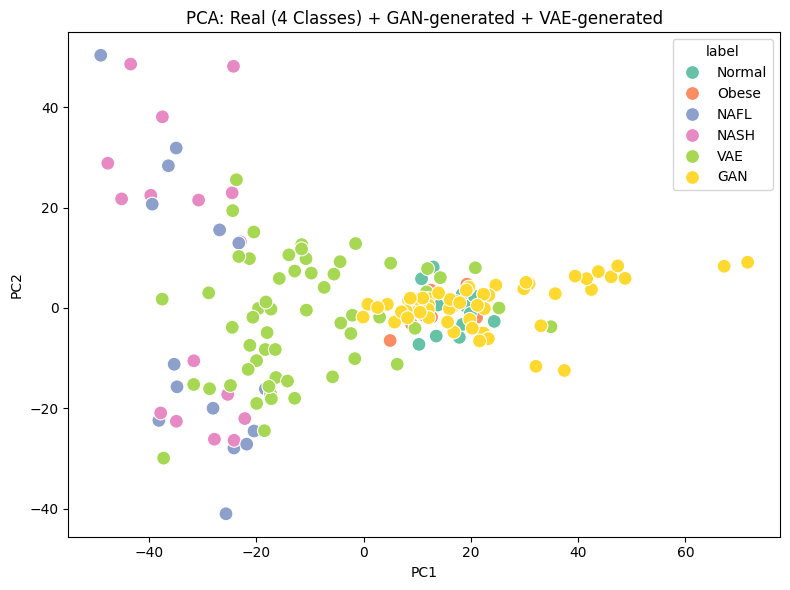

In [ ]:
# 1. 將 label 加上 'Fake' 類別
fake_labels_VAE = pd.Series(['VAE'] * X_fake_VAE.shape[0])
fake_labels_GAN = pd.Series(['GAN'] * predictions.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, X_fake_VAE, predictions])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels_VAE, fake_labels_GAN], ignore_index=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_data)

# 4. 建 DataFrame 繪圖
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = combined_labels

# 5. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2', s=100)
plt.title('PCA: Real (4 Classes) + GAN-generated + VAE-generated')
plt.tight_layout()
plt.show()

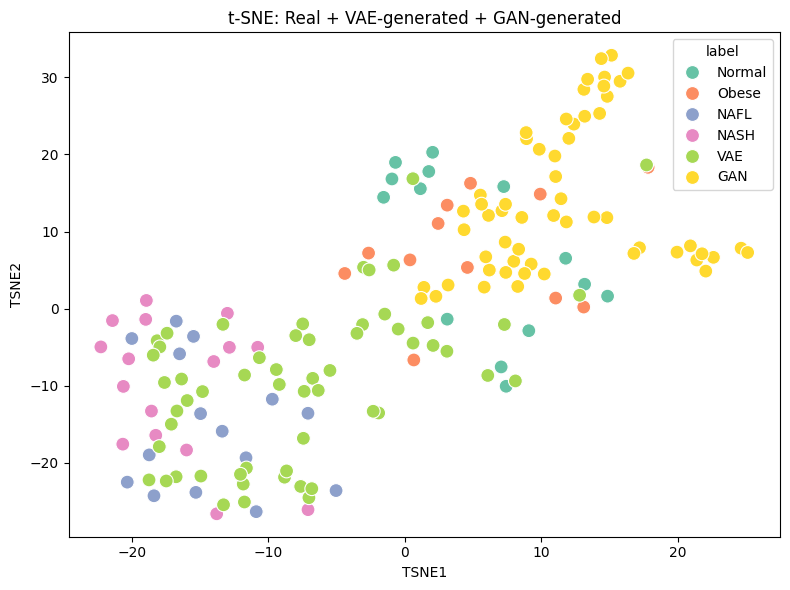

In [ ]:
# 1. 建立 t-SNE 模型
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, random_state=42)

# 2. 降維
X_tsne = tsne.fit_transform(combined_data)

# 3. 放入 DataFrame 繪圖
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = combined_labels

# 4. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='label', palette='Set2', s=100)
plt.title('t-SNE: Real + VAE-generated + GAN-generated')
plt.tight_layout()
plt.show()

In [ ]:
X_all_GAN = np.vstack([X_scaled, predictions])
y_all_GAN = np.array([1] * len(X_scaled) + [0] * len(predictions))  # 1=Real, 0=Fake

# # ===== 3. 做 PCA 降維（你也可以 skip） =====
# pca = PCA(n_components=30)
# X_pca = pca.fit_transform(X_all)

# ===== 4. 分訓練與測試集 =====
X_train, X_test, y_train, y_test = train_test_split(X_all_GAN, y_all_GAN, test_size=0.2, stratify=y_all_GAN)

# ===== 5. 建立分類器並訓練 =====
clf_GAN = LogisticRegression(max_iter=1000)
clf_GAN.fit(X_train, y_train)

# ===== 6. 評估模型效能 =====
y_pred = clf_GAN.predict(X_test)
y_prob = clf_GAN.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"\n🎯 Accuracy: {acc:.3f}")

print("Confusion Matrix:")
print(cm)


🎯 Accuracy: 1.000
Confusion Matrix:
[[11  0]
 [ 0 12]]


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# X = np.vstack([real_data, fake_data])
# y = np.array([0]*len(real_data) + [1]*len(fake_data))  # 0: real, 1: generated

# # ==== 切分資料 ====
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ==== 建立分類器 ====
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ==== 預測與評估 ====
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"分類準確率：{acc:.4f}")
print(classification_report(y_test, y_pred))

分類準確率：1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# WGAN

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
scaled_data_GAN=X_scaled
scaled_data_GAN

array([[-0.69030537,  0.34193715,  0.39721027, ..., -0.8764744 ,
         0.67709902, -0.10289072],
       [ 1.1678965 ,  0.43754965,  0.25219232, ...,  0.26483384,
        -1.41253963, -0.25848793],
       [-0.87021195,  0.42332372,  0.39377822, ..., -0.27804982,
         0.02162766, -0.12461121],
       ...,
       [-0.87855569,  0.33452903,  0.34318679, ...,  0.69769293,
        -1.05779132, -0.86921365],
       [ 1.19823824,  0.47847462, -2.6754154 , ...,  0.59969215,
         0.07763246,  1.01204659],
       [-0.50927194, -1.82251501,  0.09258105, ..., -0.0108088 ,
         0.79689819, -0.40826067]])

In [ ]:
batch_size = 4
dataset = tf.data.Dataset.from_tensor_slices(scaled_data_GAN.astype('float32')).batch(batch_size)

In [ ]:
def build_generator():
  initializer = tf.keras.initializers.RandomNormal(stddev=0.02)
  model = tf.keras.Sequential([
      layers.Dense(64,use_bias=False,input_shape=(100,),kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      layers.Dense(128,use_bias=False,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      layers.Dense(256,use_bias=False,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      # layers.Dense(512,use_bias=False,kernel_initializer=initializer),
      # layers.BatchNormalization(),
      # layers.LeakyReLU(),


      layers.Dense(3004,activation='linear',kernel_initializer=initializer)
  ])
  return model

In [ ]:
def build_discriminator():
  initializer = tf.keras.initializers.RandomNormal(stddev=0.02)
  model = tf.keras.Sequential([
      layers.Input(shape=(3004,)),

      layers.Dense(256, use_bias=False, kernel_initializer=initializer),
      layers.LeakyReLU(),
      # layers.Dropout(0.3),

      layers.Dense(128, use_bias=False, kernel_initializer=initializer),
      layers.LeakyReLU(),
      # layers.Dropout(0.3),

      layers.Dense(64, use_bias=False, kernel_initializer=initializer),
      layers.LeakyReLU(),
      # layers.Dropout(0.3),

      layers.Dense(1)
  ])
  return model

In [ ]:
# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    # real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    # fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    # return real_loss + fake_loss
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

def generator_loss(fake_output):
    # return cross_entropy(tf.ones_like(fake_output), fake_output)
    return -tf.reduce_mean(fake_output)

# def gradient_penalty(discriminator, real_data, fake_data):
#     # 計算隨機插值樣本
#     alpha = tf.random.uniform([real_data.shape[0], 1], 0.0, 1.0)
#     interpolated = alpha * real_data + (1 - alpha) * fake_data

#     with tf.GradientTape() as gp_tape:
#         gp_tape.watch(interpolated)
#         pred = discriminator(interpolated, training=True)

#     grads = gp_tape.gradient(pred, [interpolated])[0]  # 對輸入取梯度
#     grad_norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-12)
#     gp = tf.reduce_mean((grad_norm - 1.0) ** 2)  # 梯度懲罰
#     return gp


In [ ]:
generator = build_generator()
discriminator = build_discriminator()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
gen_losses = []
disc_losses = []

epochs = 100
noise_dim = 100
# num_examples_to_generate = 4
# seed = tf.random.normal([num_examples_to_generate, noise_dim])

# @tf.function
# def train_step(images):
#     noise = tf.random.normal([batch_size, noise_dim])

#     with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#         generated_images = generator(noise, training=True)
#         real_output = discriminator(images, training=True)
#         fake_output = discriminator(generated_images, training=True)
#         gen_loss = generator_loss(fake_output)
#         disc_loss = discriminator_loss(real_output, fake_output)

#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#     gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#     discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

#     return gen_loss, disc_loss

n_critic = 3  # 每次 generator update，訓練 5 次 critic
clip_value = 0.005  # 權重裁剪範圍

def train_step_wgan(images):
    for _ in range(n_critic):  # 多次訓練 critic
        noise = tf.random.normal([batch_size, noise_dim])

        with tf.GradientTape() as disc_tape:
            generated_images = generator(noise, training=True)
            real_output = discriminator(images, training=True)
            fake_output = discriminator(generated_images, training=True)
            disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        # 權重裁剪（WGAN特有）
        for var in discriminator.trainable_variables:
            var.assign(tf.clip_by_value(var, -clip_value, clip_value))

    # 訓練 Generator 一次
    noise = tf.random.normal([batch_size, noise_dim])
    with tf.GradientTape() as gen_tape:
        generated_images = generator(noise, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return gen_loss, disc_loss


In [ ]:
def plot_metrics():
    plt.figure(figsize=(8, 4))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def train(dataset, epochs):
    for epoch in range(1, epochs + 1):
        total_gen_loss = 0
        total_disc_loss = 0
        num_batches = 0
        for image_batch in dataset:
            gen_loss, disc_loss = train_step_wgan(image_batch)
            total_gen_loss += gen_loss
            total_disc_loss += disc_loss
            num_batches += 1

        avg_gen_loss = total_gen_loss / num_batches
        avg_disc_loss = total_disc_loss / num_batches
        gen_losses.append(avg_gen_loss)
        disc_losses.append(avg_disc_loss)

        # if epoch % 5 == 0 or epoch == 1:
        #     generate_table(generator, seed)
        print(f"Epoch {epoch:03d} | Gen Loss: {avg_gen_loss:.4f} | Disc Loss: {avg_disc_loss:.4f}")

    plot_metrics()

Epoch 001 | Gen Loss: -0.0000 | Disc Loss: -0.0000
Epoch 002 | Gen Loss: -0.0000 | Disc Loss: -0.0001
Epoch 003 | Gen Loss: -0.0001 | Disc Loss: -0.0004
Epoch 004 | Gen Loss: -0.0005 | Disc Loss: -0.0011
Epoch 005 | Gen Loss: -0.0021 | Disc Loss: -0.0031
Epoch 006 | Gen Loss: 0.0004 | Disc Loss: -0.0183
Epoch 007 | Gen Loss: 0.0064 | Disc Loss: -0.0806
Epoch 008 | Gen Loss: 0.0041 | Disc Loss: -0.1507
Epoch 009 | Gen Loss: -0.0549 | Disc Loss: -0.0891
Epoch 010 | Gen Loss: -0.0611 | Disc Loss: 0.0111
Epoch 011 | Gen Loss: -0.0109 | Disc Loss: 0.0108
Epoch 012 | Gen Loss: 0.0232 | Disc Loss: -0.0197
Epoch 013 | Gen Loss: 0.0351 | Disc Loss: -0.0342
Epoch 014 | Gen Loss: 0.0505 | Disc Loss: -0.0496
Epoch 015 | Gen Loss: 0.0675 | Disc Loss: -0.0727
Epoch 016 | Gen Loss: 0.0859 | Disc Loss: -0.1002
Epoch 017 | Gen Loss: 0.0941 | Disc Loss: -0.1270
Epoch 018 | Gen Loss: 0.0708 | Disc Loss: -0.1201
Epoch 019 | Gen Loss: 0.0293 | Disc Loss: -0.0844
Epoch 020 | Gen Loss: 0.0025 | Disc Loss: -0

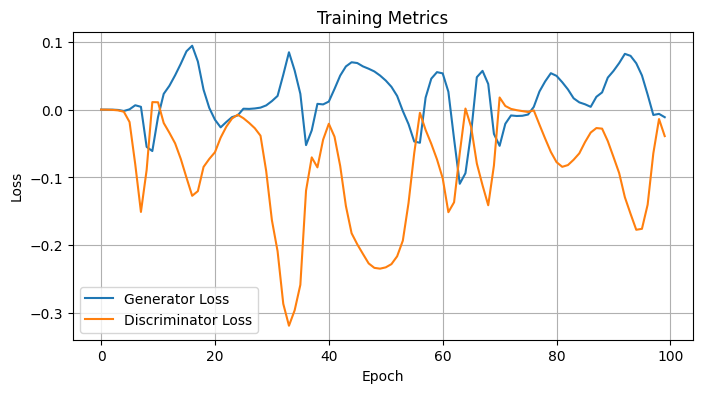

In [ ]:
train(dataset, epochs)

In [ ]:
seed = tf.random.normal([57, noise_dim])
predictions_WGAN = generator(seed, training=False).numpy()
original_scale_data_WGAN = scaler.inverse_transform(predictions_WGAN)
generated_df_WGAN = pd.DataFrame(original_scale_data_WGAN, columns=filtered_df.columns)
display(generated_df_WGAN.shape)

(57, 3004)

In [ ]:
generated_df_WGAN

gene,GSTM1,RPS4Y1,CFHR1,ZBTB20,AOC1,SMIM24,CFHR3,AKR1B10,PZP,XPNPEP2,...,SERPINB9,JAG1,PLEKHA4,YY2,FAM78B,ZNF334,CYP3A7-CYP3A51P,SLC11A1,ARHGEF35,HJURP
0,6.948923,8.477217,12.113019,8.460537,4.843191,6.741014,10.098642,6.346226,7.395385,6.805300,...,5.924602,6.476653,7.586982,3.335521,4.150270,4.209353,2.902650,4.517502,3.630874,3.028518
1,2.525618,7.857702,9.601303,6.661045,4.749610,6.564415,9.667386,7.032687,6.649024,7.000451,...,5.777459,6.351467,7.130948,3.667639,4.139126,4.303520,2.750138,4.239393,3.312100,2.584441
2,7.541269,10.038131,11.612485,5.983135,5.807013,7.541431,10.259968,5.550111,6.362412,8.286794,...,6.235343,6.454318,7.207630,3.121694,3.656720,4.502542,2.867607,4.099044,3.565241,2.594833
3,0.890091,4.744190,10.301726,9.476435,3.548252,5.665805,8.526608,8.451854,7.387597,5.618177,...,5.512826,6.060998,7.216199,4.437609,4.485747,3.859032,2.245883,5.377714,3.700687,2.828362
4,10.525396,12.413619,10.496730,4.160155,6.743652,7.685364,10.552071,5.406115,5.077890,8.727576,...,6.511086,6.434206,7.063184,2.964768,3.653634,4.704526,3.078283,3.721247,3.325883,2.428682
5,6.414675,8.206311,11.723929,7.886168,4.831880,7.123276,9.220767,5.990519,6.998615,7.307974,...,5.995228,6.443922,7.443292,3.551026,3.877632,4.091891,2.799536,4.625022,3.670183,2.860949
6,4.644104,7.253478,11.604232,8.978112,4.879385,6.090859,9.457498,5.885342,7.413290,6.838980,...,5.911459,6.461319,7.414355,3.830481,4.174118,4.063576,2.651019,4.768809,3.543496,2.934552
7,7.704453,8.318385,11.658566,7.994314,5.318301,6.725989,9.591918,4.938598,6.280679,7.942866,...,6.248239,6.441561,7.387887,3.541537,3.854154,4.296633,2.949655,4.492810,3.595509,2.885923
8,4.674399,7.059014,10.277487,8.071200,4.347795,5.454438,9.098164,8.611189,7.076449,5.670213,...,5.676582,6.335896,7.409101,3.953480,4.529537,4.139500,2.486889,4.813588,3.450130,2.875554
9,5.319851,6.226647,10.699293,9.268213,3.426215,6.111831,9.047641,5.766327,7.083843,6.008636,...,5.835415,6.383698,7.617473,4.012817,4.289822,3.948203,2.743416,4.890888,3.735951,3.156723


In [ ]:
real_data = filtered_df.values
fake_data_WGAN = generated_df_GAN.values

In [ ]:
print(real_data.shape)
print(fake_data_WGAN.shape)

(57, 3004)
(57, 3004)


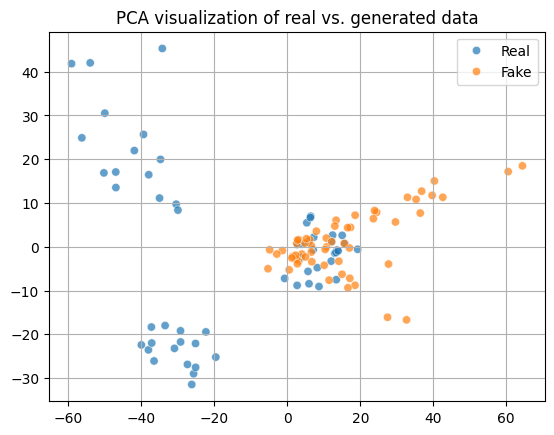

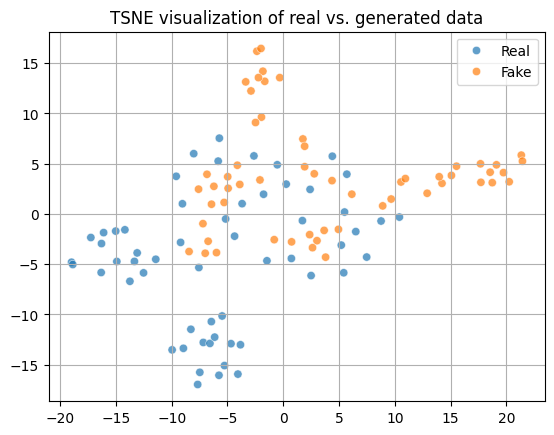

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
def visualize_pca_tsne(real, fake, method='pca'):
    data = np.concatenate([real, fake])
    labels = ['Real'] * len(real) + ['Fake'] * len(fake)

    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=10)

    reduced = reducer.fit_transform(data)
    sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=labels, alpha=0.7)
    plt.title(f'{method.upper()} visualization of real vs. generated data')
    plt.grid(True)
    plt.show()
visualize_pca_tsne(real_data, fake_data_WGAN, method='pca')
visualize_pca_tsne(real_data, fake_data_WGAN, method='tsne')

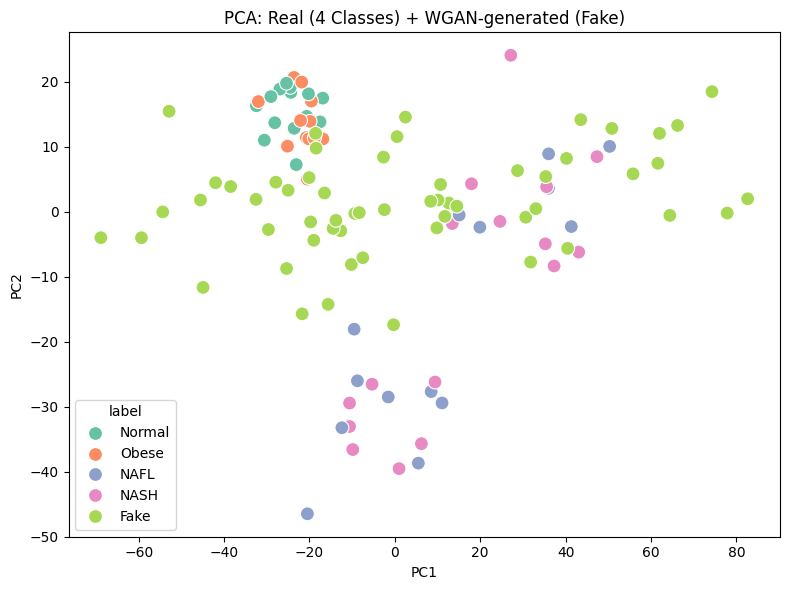

In [ ]:
# 1. 將 label 加上 'Fake' 類別
real_labels = labels.copy()
fake_labels = pd.Series(['Fake'] * predictions_WGAN.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, predictions_WGAN])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels], ignore_index=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_data)

# 4. 建 DataFrame 繪圖
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = combined_labels

# 5. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2', s=100)
plt.title('PCA: Real (4 Classes) + WGAN-generated (Fake)')
plt.tight_layout()
plt.show()

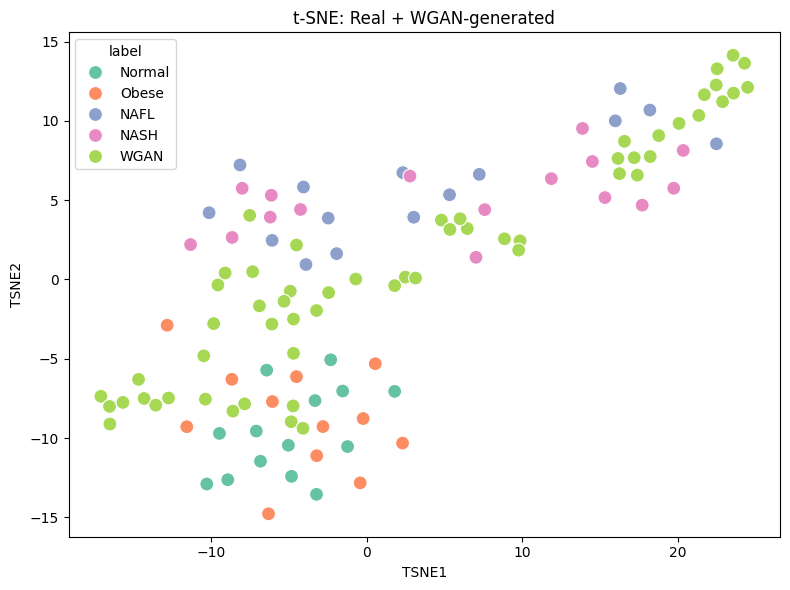

In [ ]:
real_labels = labels.copy()
fake_labels = pd.Series(['WGAN'] * predictions_WGAN.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, predictions_WGAN])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels], ignore_index=True)
# 1. 建立 t-SNE 模型
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, random_state=42)

# 2. 降維
X_tsne = tsne.fit_transform(combined_data)

# 3. 放入 DataFrame 繪圖
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = combined_labels

# 4. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='label', palette='Set2', s=100)
plt.title('t-SNE: Real + WGAN-generated')
plt.tight_layout()
plt.show()

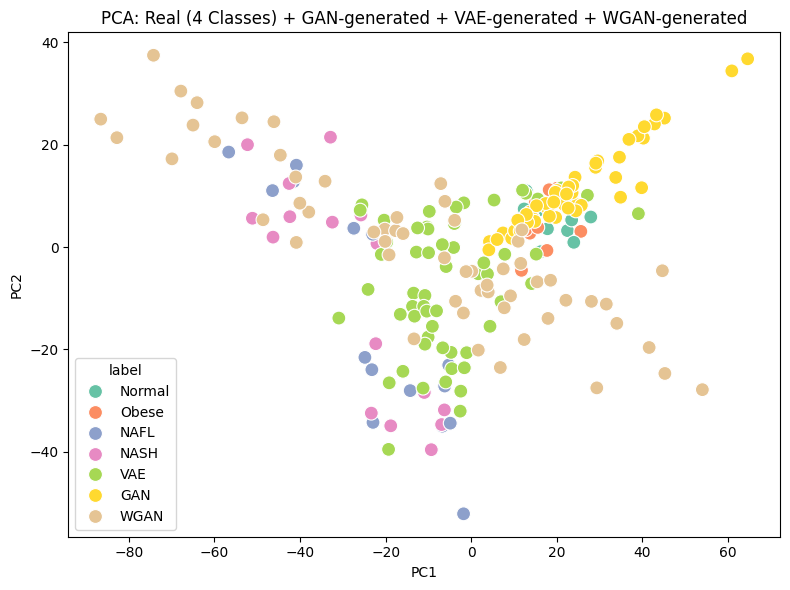

In [ ]:
# 1. 將 label 加上 'Fake' 類別
fake_labels_VAE = pd.Series(['VAE'] * X_fake_VAE.shape[0])
fake_labels_GAN = pd.Series(['GAN'] * predictions.shape[0])
fake_labels_WGAN = pd.Series(['WGAN'] * predictions_WGAN.shape[0])

# 2. 合併資料和標籤
combined_data = np.vstack([X_scaled, X_fake_VAE, predictions, predictions_WGAN])  # (real + fake, genes)
combined_labels = pd.concat([real_labels, fake_labels_VAE, fake_labels_GAN, fake_labels_WGAN], ignore_index=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_data)

# 4. 建 DataFrame 繪圖
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = combined_labels

# 5. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2', s=100)
plt.title('PCA: Real (4 Classes) + GAN-generated + VAE-generated + WGAN-generated')
plt.tight_layout()
plt.show()

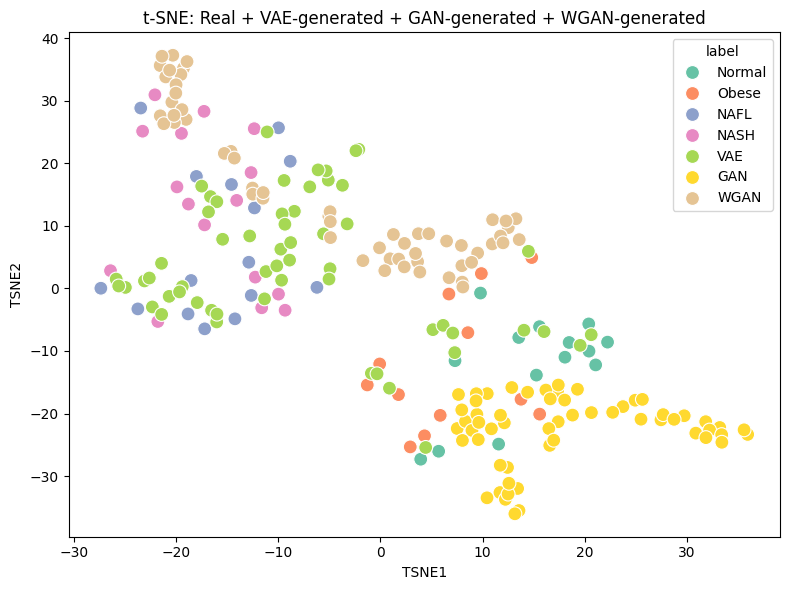

In [ ]:
# 1. 建立 t-SNE 模型
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, random_state=42)

# 2. 降維
X_tsne = tsne.fit_transform(combined_data)

# 3. 放入 DataFrame 繪圖
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = combined_labels

# 4. 繪圖
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='label', palette='Set2', s=100)
plt.title('t-SNE: Real + VAE-generated + GAN-generated + WGAN-generated')
plt.tight_layout()
plt.show()

In [ ]:
X_all_WGAN = np.vstack([X_scaled, predictions_WGAN])
y_all_WGAN = np.array([1] * len(X_scaled) + [0] * len(predictions_WGAN))  # 1=Real, 0=Fake

# # ===== 3. 做 PCA 降維（你也可以 skip） =====
# pca = PCA(n_components=30)
# X_pca = pca.fit_transform(X_all)

# ===== 4. 分訓練與測試集 =====
X_train, X_test, y_train, y_test = train_test_split(X_all_WGAN, y_all_WGAN, test_size=0.2, stratify=y_all_WGAN)

# ===== 5. 建立分類器並訓練 =====
clf_GAN = LogisticRegression(max_iter=1000)
clf_GAN.fit(X_train, y_train)

# ===== 6. 評估模型效能 =====
y_pred = clf_GAN.predict(X_test)
y_prob = clf_GAN.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"\n🎯 Accuracy: {acc:.3f}")

print("Confusion Matrix:")
print(cm)


🎯 Accuracy: 0.696
Confusion Matrix:
[[12  0]
 [ 7  4]]


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# X = np.vstack([real_data, fake_data])
# y = np.array([0]*len(real_data) + [1]*len(fake_data))  # 0: real, 1: generated

# # ==== 切分資料 ====
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ==== 建立分類器 ====
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ==== 預測與評估 ====
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"分類準確率：{acc:.4f}")
print(classification_report(y_test, y_pred))

分類準確率：1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# CGAN

In [ ]:
y_encoded

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
from tensorflow.keras.utils import to_categorical

# 將 y_encoded (整數類別) 轉成 one-hot：0→[1,0,0,0], 1→[0,1,0,0]...
y_onehot = to_categorical(y_encoded, num_classes=4)
y_onehot

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [ ]:
batch_size = 4

# 將資料與 one-hot label 串起來
dataset = tf.data.Dataset.from_tensor_slices((scaled_data_GAN.astype('float32'), y_onehot.astype('float32'))).batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 3004), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [ ]:
# 超參數
input_dim = 3004      # 基因表現維度
noise_dim = 100       # 噪聲向量維度
label_dim = 4         # 分類數（例如 Normal/Obese/NAFL/NASH）
epochs = 100
# Generator
def build_cgan_generator(noise_dim, label_dim, output_dim):
    noise_input = tf.keras.Input(shape=(noise_dim,))
    label_input = tf.keras.Input(shape=(label_dim,))
    x = layers.Concatenate()([noise_input, label_input])
    x = layers.Dense(64)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dense(128)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dense(256)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dense(output_dim, activation='linear')(x)
    return Model([noise_input, label_input], x)

# Discriminator
def build_cgan_discriminator(input_dim, label_dim):
    data_input = tf.keras.Input(shape=(input_dim,))
    label_input = tf.keras.Input(shape=(label_dim,))
    x = layers.Concatenate()([data_input, label_input])
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(1)(x)
    return Model([data_input, label_input], x)

# 搭建模型
generator = build_cgan_generator(noise_dim, label_dim, input_dim)
discriminator = build_cgan_discriminator(input_dim, label_dim)

# 損失與優化器
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_opt = tf.keras.optimizers.Adam(1e-4)
d_opt = tf.keras.optimizers.Adam(1e-4)

# 訓練 step
# @tf.function
def cgan_train_step(real_data, real_labels):
    batch_size = tf.shape(real_data)[0]
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
        fake_data = generator([noise, real_labels], training=True)
        real_output = discriminator([real_data, real_labels], training=True)
        fake_output = discriminator([fake_data, real_labels], training=True)

        d_loss = loss_fn(tf.ones_like(real_output), real_output) + loss_fn(tf.zeros_like(fake_output), fake_output)
        g_loss = loss_fn(tf.ones_like(fake_output), fake_output)

    d_grads = d_tape.gradient(d_loss, discriminator.trainable_variables)
    g_grads = g_tape.gradient(g_loss, generator.trainable_variables)
    d_opt.apply_gradients(zip(d_grads, discriminator.trainable_variables))
    g_opt.apply_gradients(zip(g_grads, generator.trainable_variables))

    return g_loss, d_loss

In [ ]:
def train(dataset, epochs):
    gen_losses = []
    disc_losses = []

    for epoch in range(epochs):
        total_g, total_d, steps = 0, 0, 0
        for batch_data, batch_labels in dataset:
            g_loss, d_loss = cgan_train_step(batch_data, batch_labels)
            total_g += g_loss
            total_d += d_loss
            steps += 1
        gen_losses.append(total_g / steps)
        disc_losses.append(total_d / steps)
        print(f"Epoch {epoch+1}/{epochs} | G Loss: {gen_losses[-1]:.4f} | D Loss: {disc_losses[-1]:.4f}")

    plt.plot(gen_losses, label="Generator Loss")
    plt.plot(disc_losses, label="Discriminator Loss")
    plt.legend()
    plt.title("Training Loss")
    plt.grid(True)
    plt.show()

Epoch 1/100 | G Loss: 0.5687 | D Loss: 2.2564
Epoch 2/100 | G Loss: 0.3109 | D Loss: 1.8600
Epoch 3/100 | G Loss: 0.2687 | D Loss: 1.8795
Epoch 4/100 | G Loss: 0.2528 | D Loss: 1.9180
Epoch 5/100 | G Loss: 0.3263 | D Loss: 1.6634
Epoch 6/100 | G Loss: 0.3615 | D Loss: 1.5728
Epoch 7/100 | G Loss: 0.4263 | D Loss: 1.2941
Epoch 8/100 | G Loss: 0.4777 | D Loss: 1.2392
Epoch 9/100 | G Loss: 0.4992 | D Loss: 1.2102
Epoch 10/100 | G Loss: 0.5123 | D Loss: 1.1467
Epoch 11/100 | G Loss: 0.5766 | D Loss: 1.0257
Epoch 12/100 | G Loss: 0.6416 | D Loss: 0.9668
Epoch 13/100 | G Loss: 0.6686 | D Loss: 0.8274
Epoch 14/100 | G Loss: 0.6651 | D Loss: 0.9377
Epoch 15/100 | G Loss: 0.7277 | D Loss: 0.8074
Epoch 16/100 | G Loss: 0.7904 | D Loss: 0.8008
Epoch 17/100 | G Loss: 0.7276 | D Loss: 0.7975
Epoch 18/100 | G Loss: 0.7351 | D Loss: 0.8819
Epoch 19/100 | G Loss: 0.7513 | D Loss: 0.7436
Epoch 20/100 | G Loss: 0.8121 | D Loss: 0.7826
Epoch 21/100 | G Loss: 0.8209 | D Loss: 0.8350
Epoch 22/100 | G Loss:

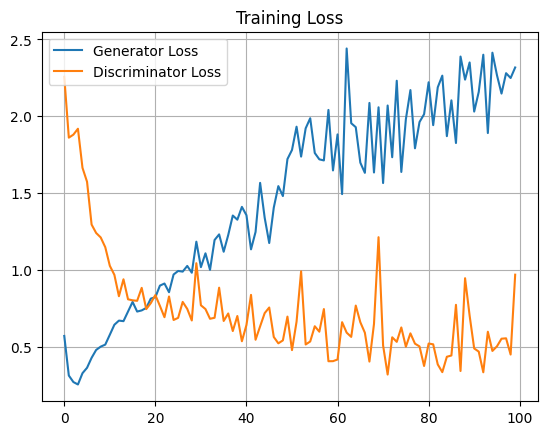

In [ ]:
train(dataset, epochs)

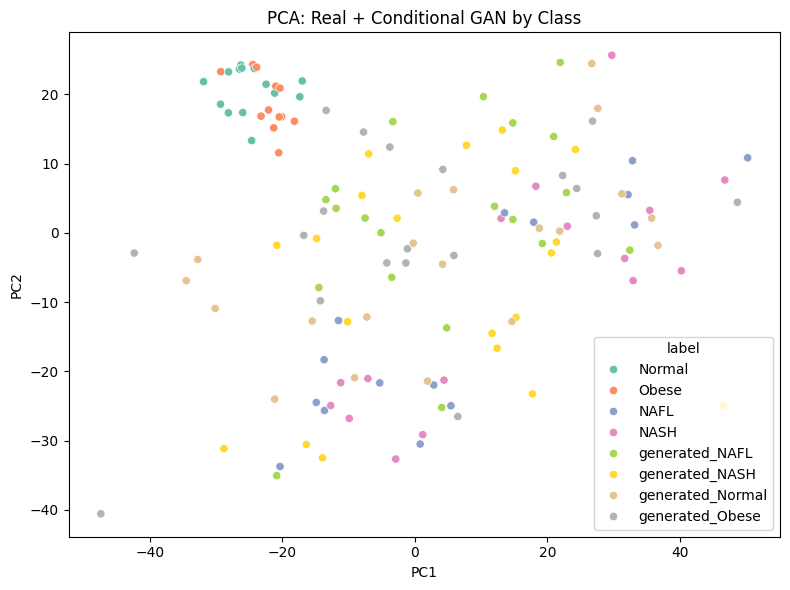

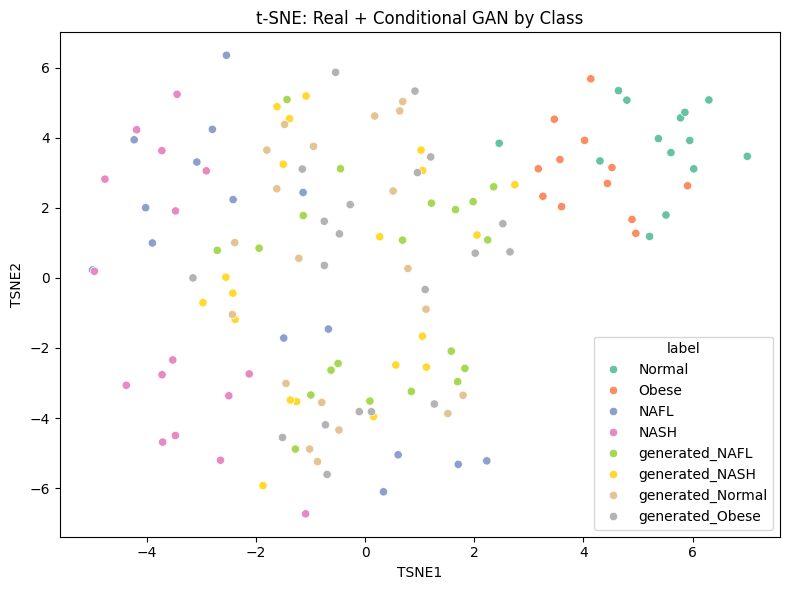

In [ ]:
origin_labels = ['NAFL', 'NASH', 'Normal', 'Obese']
label_mapping = {i: name for i, name in enumerate(origin_labels)}

def generate_conditional_samples(generator, num_classes=4, samples_per_class=20, noise_dim=100):
    all_generated = []
    all_labels = []

    for label in range(num_classes):
        noise = tf.random.normal([samples_per_class, noise_dim])
        labels = tf.constant([label] * samples_per_class)
        labels_one_hot = tf.one_hot(labels, depth=num_classes)
        fake_samples = generator([noise, labels_one_hot], training=False)
        all_generated.append(fake_samples.numpy())

        # 將標籤名稱變為 generated_NAFL 這類型
        all_labels.extend([f'generated_{label_mapping[label]}' for _ in range(samples_per_class)])

    generated_data = np.vstack(all_generated)
    generated_labels = np.array(all_labels)
    return generated_data, generated_labels

X_fake_condGAN, y_fake_condGAN = generate_conditional_samples(generator)
# 將原始類別數字轉為文字標籤
y_real_named = [label_mapping[i] for i in y_encoded]

# 合併
X_combined = np.vstack([X_scaled, X_fake_condGAN])
combined_labels = y_real_named + list(y_fake_condGAN)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = combined_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set2')
plt.title("PCA: Real + Conditional GAN by Class")
plt.tight_layout()
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_combined)
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = combined_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='label', palette='Set2')
plt.title("t-SNE: Real + Conditional GAN by Class")
plt.tight_layout()
plt.show()


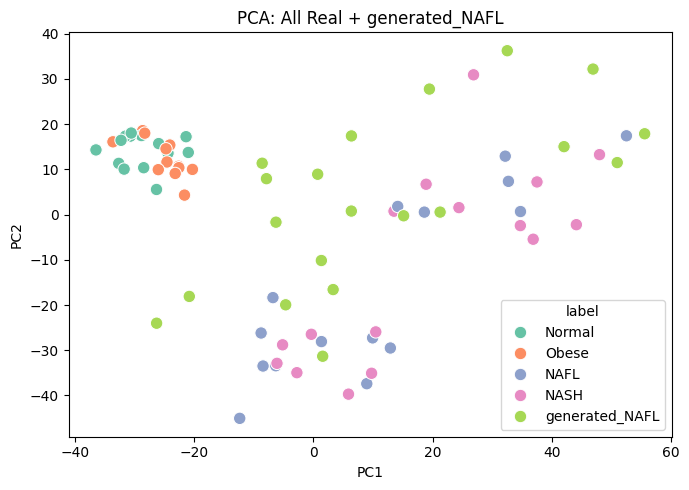

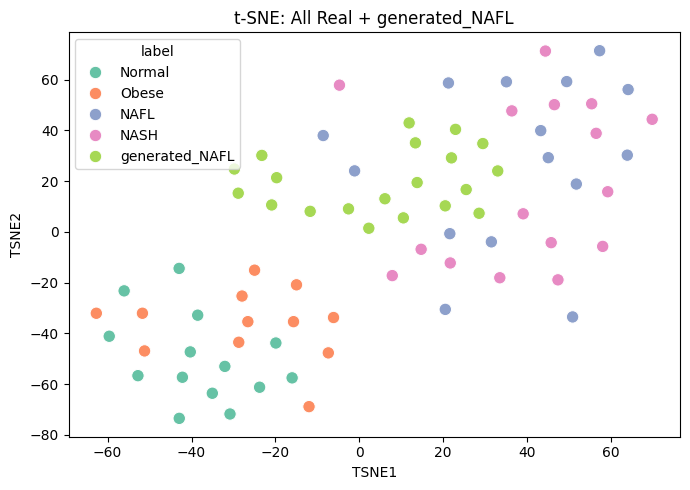

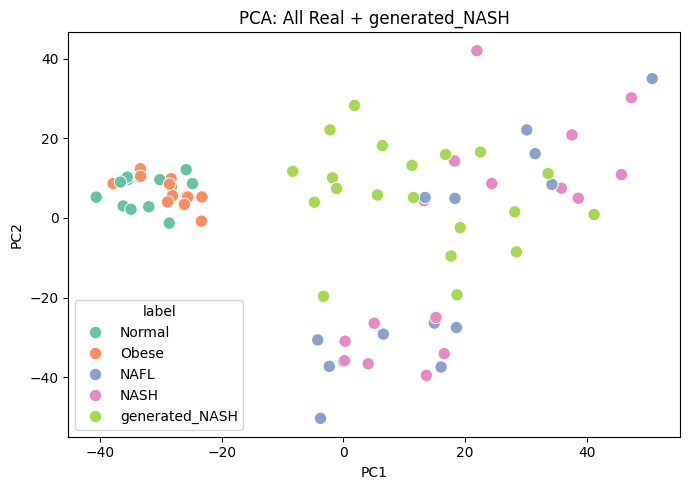

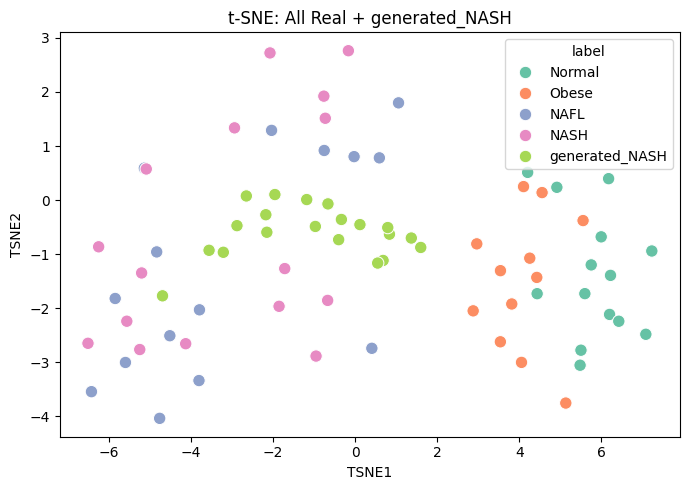

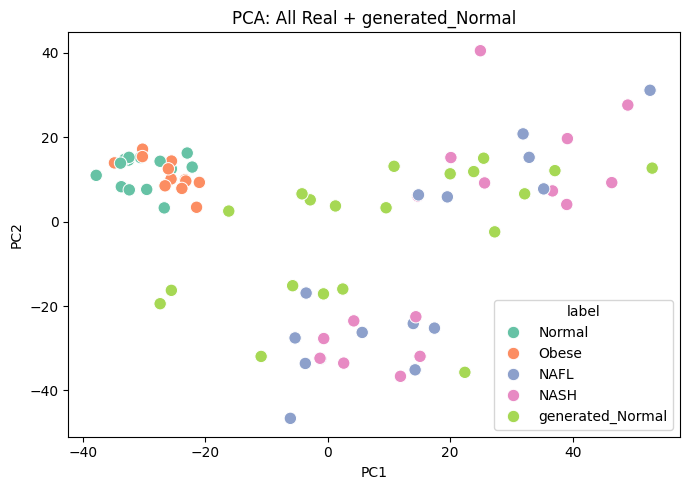

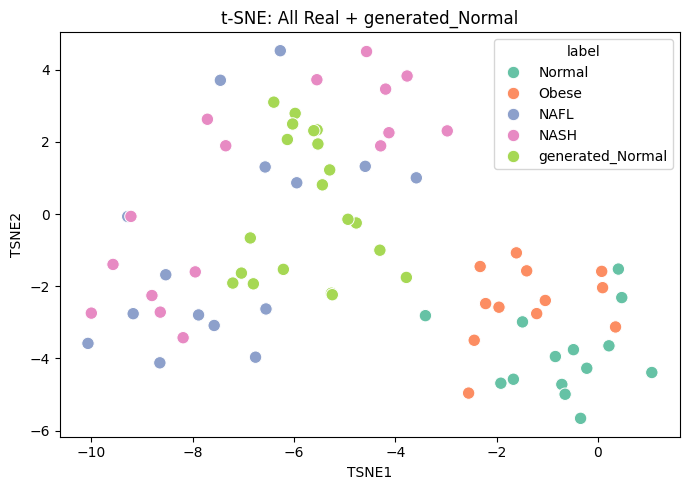

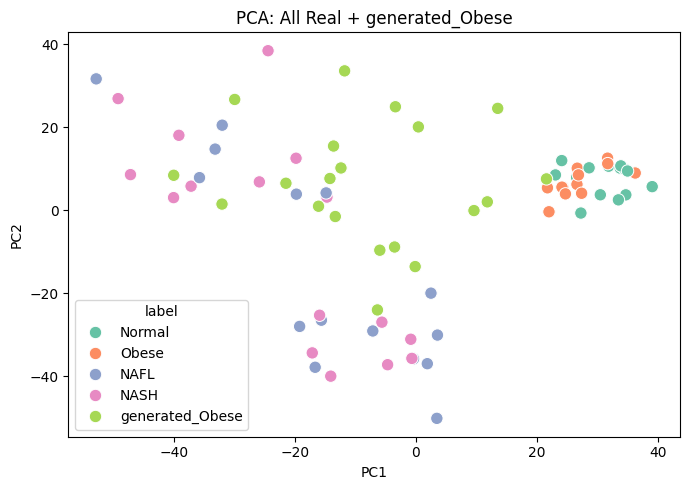

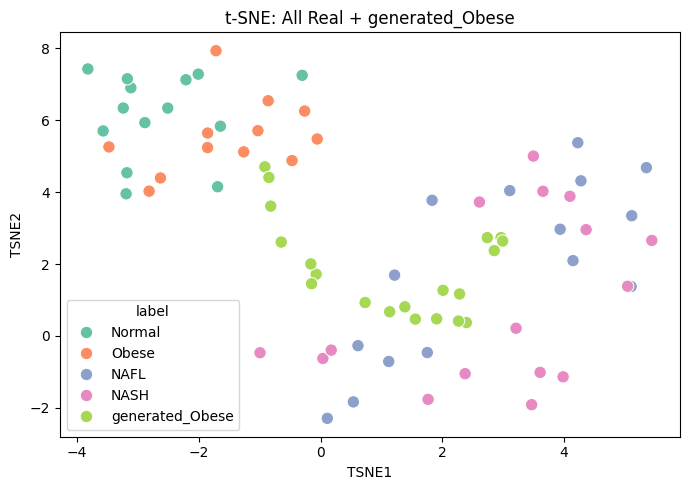

In [ ]:
# ---------- 一：生成樣本 Function ----------
def generate_conditional_samples(generator, num_samples_per_class, num_classes=4, noise_dim=100):
    generated_data_dict = {}

    for class_label in range(num_classes):
        noise = tf.random.normal([num_samples_per_class, noise_dim])
        labels = tf.constant([class_label] * num_samples_per_class)

        # One-hot encode labels if needed
        label_input = tf.one_hot(labels, depth=num_classes)
        generated = generator([noise, label_input], training=False).numpy()

        # 存進 dict，鍵為類別名（對照表可以改）
        class_name = label_mapping[class_label]
        generated_data_dict[class_name] = generated

    return generated_data_dict

def plot_one_generated_class_in_context(real_data, y_encoded, generated_data_dict, class_name):
    # 將數字標籤轉成對應的文字標籤
    real_labels_named = [label_mapping[label] for label in y_encoded]
    real_labels_series = pd.Series(real_labels_named, name="label")

    # 單類生成資料
    gen_data = generated_data_dict[class_name]
    gen_df = pd.DataFrame(gen_data)
    gen_labels = pd.Series([f"generated_{class_name}"] * len(gen_df), name="label")

    # 合併資料與標籤
    combined_df = pd.concat([pd.DataFrame(real_data), gen_df], axis=0).reset_index(drop=True)
    combined_labels = pd.concat([real_labels_series, gen_labels], axis=0).reset_index(drop=True)

    # 標準化
    scaler = StandardScaler()
    scaled = scaler.fit_transform(combined_df)

    # ===== PCA =====
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(scaled)
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['label'] = combined_labels

    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2', s=80)
    plt.title(f'PCA: All Real + generated_{class_name}')
    plt.tight_layout()
    plt.show()

    # ===== t-SNE =====
    tsne = TSNE(n_components=2, perplexity=20, learning_rate=100, random_state=42)
    X_tsne = tsne.fit_transform(scaled)
    tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    tsne_df['label'] = combined_labels

    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='label', palette='Set2', s=80)
    plt.title(f't-SNE: All Real + generated_{class_name}')
    plt.tight_layout()
    plt.show()

# ---------- 三：使用範例 ----------

# 🧠 Label 編碼對應表（依你上面的圖片）
label_mapping = {
    0: 'NAFL',
    1: 'NASH',
    2: 'Normal',
    3: 'Obese'
}

# 假設你有這些資料（請根據實際變數名稱代入）
# - generator: 已訓練好的條件生成器
# - real_data: 真實樣本 (NumPy array)
# - y_encoded: 數字標籤，例如 [2,3,2,...]
# - noise_dim: 噪音向量維度（你訓練的時候定義）

num_samples_per_class = 20
generated_data_dict = generate_conditional_samples(generator, num_samples_per_class, noise_dim=noise_dim)

# 🔁 每次畫一個類別
for class_name in label_mapping.values():
    plot_one_generated_class_in_context(X_scaled, y_encoded, generated_data_dict, class_name)
